In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import statsmodels.formula.api as smf
from matplotlib.ticker import FuncFormatter


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **Consigna 1)**

Lea el archivo “df_icd_2025.csv”. ¿Qué puede decir acerca de la estructura del dataset? Mencione cantidad y tipos de columnas, datos faltantes, de qué va el conjunto de datos en términos generales.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')
base = pd.read_csv("/content/drive/MyDrive/df_icd_2025.csv")

Mounted at /content/drive/


In [ ]:
base.head(10)

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
0,2019-08-04,-34.563967,-58.456699,Capital Federal,Belgrano,Departamento,1.0,1.0,37,34,109500,Monoambiente de 4 años de antiguedad muy lumin...
1,2019-07-30,-34.563967,-58.456699,Capital Federal,Belgrano,Departamento,1.0,1.0,35,31,109500,IMPECABLE departamentoSuper luminoso En edific...
2,2020-10-13,-34.563290,-58.456581,Capital Federal,Belgrano,Departamento,1.0,1.0,30,30,78000,MONOAMBIENTE UBICACIÓN PRIVILEGIADA EN BELGRA...
3,2022-02-07,-34.563290,-58.456581,Capital Federal,Belgrano,Departamento,2.0,1.0,31,31,49000,Oficina transformada en dpto de 2 ...
4,2018-09-26,-34.563615,-58.456819,Capital Federal,Belgrano,Departamento,1.0,1.0,34,31,137500,Cerca de todo Av Cabildo centros de consumo m...
5,2019-05-15,-34.563291,-58.456153,Capital Federal,Belgrano,Departamento,1.0,1.0,29,29,90000,HERMOSO DEPARTAMENTO EN BELGRANO departamento ...
6,2018-02-11,-34.564092,-58.456553,Capital Federal,Belgrano,Departamento,2.0,1.0,36,36,92000,Se trata de un departamento que cuenta con est...
7,2018-06-14,-34.563615,-58.456819,Capital Federal,Belgrano,Departamento,1.0,1.0,34,31,128000,Cerca de todo Av Cabildo centros de consumo m...
8,2017-07-29,-34.563291,-58.456153,Capital Federal,Belgrano,Departamento,1.0,1.0,37,37,98000,Departamento en Venta en Belgrano de 1 ambient...
9,2019-03-25,-34.564153,-58.456508,Capital Federal,Belgrano,Oficina,2.0,1.0,40,40,138000,2 AMBIENTES TODO REFACCIONADO A NUEVO LATERA...


La base tiene la informacion de departamentos publicados para la venta , con sus características:  fecha de publicación , latitud/longitud , lugar de venta , barrio , tipo de propiedad,cantidad de cuartos , cantidad de baños , metros totales , metros cubiertos, precio y descripción.

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478739 entries, 0 to 478738
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_on       478739 non-null  object 
 1   lat              478739 non-null  float64
 2   lon              478739 non-null  float64
 3   l2               478739 non-null  object 
 4   l3               478739 non-null  object 
 5   prop_type        478739 non-null  object 
 6   rooms            478739 non-null  float64
 7   bathrooms        478739 non-null  float64
 8   surface_total    478739 non-null  int64  
 9   surface_covered  478739 non-null  int64  
 10  price            478739 non-null  int64  
 11  description      478739 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 43.8+ MB


Ninguna de las columnas presenta datos faltantes

In [ ]:
datos_fantantes= base.isnull().sum()
datos_fantantes

,0
created_on,0
lat,0
lon,0
l2,0
l3,0
prop_type,0
rooms,0
bathrooms,0
surface_total,0
surface_covered,0


Ninguna de las columnas presenta datos faltantes

# **Consigna 2)**

Filtre los barrios (columna l3) correspondientes a su grupo y filtre también el tipo de propiedad (prop_type) para que sólamente incluya “Departamento”, “Casa” y “PH”.

In [ ]:
barrios_E10 = ['Congreso', 'Boedo', 'Villa Pueyrredón', 'Palermo']

In [ ]:
T_propiedad = ['Departamento', 'Casa', 'PH']

In [ ]:
base_E10 = base[base['l3'].isin(barrios_E10)]
base_E10 = base_E10[base_E10['prop_type'].isin(T_propiedad)]
base_E10.head()

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
590,2020-11-17,-34.586448,-58.440017,Capital Federal,Palermo,Departamento,2.0,1.0,45,40,87750,VENTA DEPARTAMENTO PALERMO HOLLYWOOD estrenar ...
591,2021-06-23,-34.586448,-58.440017,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,124800,MOOD NICETOIngresa a la Comunidad MOODNICETO V...
592,2017-08-30,-34.586826,-58.439427,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...
593,2020-11-25,-34.586494,-58.439718,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,117000,OPORTUNIDAD DE INVERSIÓN EN PALERMO HOLLYWOODU...
594,2017-07-27,-34.586826,-58.439427,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...


**La "base_E10" es la que posee los departamenta/ph/casas que corresponden al equipo 10**

In [ ]:
#tabla dinamica cantidad de prop_type por barrio
pd.pivot_table(base_E10, index='prop_type', columns='l3', values='price', aggfunc='count',margins=True, margins_name='Total')

l3,Boedo,Congreso,Palermo,Villa Pueyrredón,Total
prop_type,,,,,
Casa,344,20,703,455,1522
Departamento,3597,3475,64178,2628,73878
PH,1112,231,3580,1125,6048
Total,5053,3726,68461,4208,81448


Esta tabla pivot donde nos muestra como se distribuye el total de las publicaciones por BARRIO y por TIPO DE PROPIEDAD

---
# **Base E10 Solo tiene casas**

In [ ]:
barrios_E10 = ['Congreso', 'Boedo', 'Villa Pueyrredón', 'Palermo']
T_Casa = ['Casa']
base_E10PorPropiedad = base_E10[base_E10['prop_type'].isin(T_Casa)]
base_E10PorPropiedad

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
647,2020-05-05,-34.586777,-58.439281,Capital Federal,Palermo,Casa,3.0,2.0,164,120,290000,PH muy luminoso con muy lindo patio y muy bue...
1594,2016-03-03,-34.632121,-58.429674,Capital Federal,Boedo,Casa,4.0,1.0,230,100,254500,SE TRATA DE 2 PH SOBRE TERRENO PROPIO AL FRENT...
2772,2016-12-30,-34.568952,-58.438318,Capital Federal,Palermo,Casa,5.0,6.0,1050,700,2990000,Importante casa en zona de embajadas con gran...
2779,2019-01-22,-34.569541,-58.438990,Capital Federal,Palermo,Casa,7.0,4.0,500,500,1100000,Zona de embajadas Maure y Malasia Espectacula...
2786,2018-03-03,-34.568938,-58.438300,Capital Federal,Palermo,Casa,8.0,4.0,1100,600,1950000,Excelente ubicación en zona Residencial barrio...
...,...,...,...,...,...,...,...,...,...,...,...,...
478242,2020-09-03,-34.581775,-58.513522,Capital Federal,Villa Pueyrredón,Casa,4.0,1.0,196,136,215000,Corredor Responsable Patricia Maria Sodor CUC...
478243,2019-08-17,-34.581775,-58.513522,Capital Federal,Villa Pueyrredón,Casa,4.0,1.0,196,136,275000,Corredor Responsable Patricia Maria Sodor CUC...
478244,2021-03-12,-34.581775,-58.513522,Capital Federal,Villa Pueyrredón,Casa,4.0,1.0,136,136,215000,Corredor Responsable Fernando Muñoz CUCICBA 6...
478443,2020-04-22,-34.576607,-58.505787,Capital Federal,Villa Pueyrredón,Casa,5.0,3.0,290,290,470000,Excelente casa en dos plantas reciclada a nuev...


# **Base E10 Solo tiene Departamentos**

In [ ]:
barrios_E10 = ['Congreso', 'Boedo', 'Villa Pueyrredón', 'Palermo']
T_Departamento = ['Departamento']
base_E10PorPropiedad = base_E10[base_E10['prop_type'].isin(T_Departamento)]
base_E10PorPropiedad

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
590,2020-11-17,-34.586448,-58.440017,Capital Federal,Palermo,Departamento,2.0,1.0,45,40,87750,VENTA DEPARTAMENTO PALERMO HOLLYWOOD estrenar ...
591,2021-06-23,-34.586448,-58.440017,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,124800,MOOD NICETOIngresa a la Comunidad MOODNICETO V...
592,2017-08-30,-34.586826,-58.439427,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...
593,2020-11-25,-34.586494,-58.439718,Capital Federal,Palermo,Departamento,2.0,1.0,52,42,117000,OPORTUNIDAD DE INVERSIÓN EN PALERMO HOLLYWOODU...
594,2017-07-27,-34.586826,-58.439427,Capital Federal,Palermo,Departamento,1.0,1.0,42,42,169000,VENTA Depto de 1 Ambiente Apaisado en Fitz Roy...
...,...,...,...,...,...,...,...,...,...,...,...,...
478698,2018-05-31,-34.573311,-58.392153,Capital Federal,Palermo,Departamento,3.0,2.0,91,88,213000,3 ambientes en venta en Palermo Muy buena zon...
478712,2019-08-01,-34.581039,-58.397478,Capital Federal,Palermo,Departamento,2.0,1.0,51,46,350000,Muy lindo dos ambientes en Palermo Chico piso ...
478718,2017-08-22,-34.581361,-58.418630,Capital Federal,Palermo,Departamento,1.0,1.0,42,24,130000,A ESTRENAR Excelente ubicación a metros del J...
478722,2017-01-03,-34.569777,-58.414389,Capital Federal,Palermo,Departamento,6.0,3.0,275,275,1100000,EXCELENTE PISO SOBRE FIGUEROA ALCORTA Reciclad...


# **Base E10 Solo tiene PH**

In [ ]:
barrios_E10 = ['Congreso', 'Boedo', 'Villa Pueyrredón', 'Palermo']
T_PH = ['PH']
base_E10PorPropiedad = base_E10[base_E10['prop_type'].isin(T_PH)]
base_E10PorPropiedad

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
646,2021-11-02,-34.587448,-58.439880,Capital Federal,Palermo,PH,3.0,1.0,80,1,165000,Muy buen ph en segundo piso por escalera sin e...
720,2017-10-19,-34.586748,-58.439285,Capital Federal,Palermo,PH,4.0,2.0,126,106,320000,Lindísimo PH al frente primer piso por escaler...
737,2017-08-21,-34.586878,-58.439253,Capital Federal,Palermo,PH,4.0,2.0,199,199,504000,Corredor Responsable Lucas Federico Delgado C...
738,2020-02-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,220000,Apto crédito PH de 3 ambientes al frente 2º pi...
769,2019-02-27,-34.587674,-58.440163,Capital Federal,Palermo,PH,3.0,1.0,232,122,330000,HERMOSO PH RECICLADO 3 AMB CON TERRAZA PROPIA ...
...,...,...,...,...,...,...,...,...,...,...,...,...
478170,2021-02-13,-34.580073,-58.417418,Capital Federal,Palermo,PH,3.0,1.0,63,55,62000,Corredor Responsable Gilda F Clauso REG 3350C...
478240,2021-03-31,-34.581735,-58.514471,Capital Federal,Villa Pueyrredón,PH,3.0,2.0,255,122,265000,Corredor Responsable Hernan Perrone CUCICBA 2...
478345,2020-07-30,-34.573563,-58.426385,Capital Federal,Palermo,PH,2.0,2.0,60,60,178000,Corredor Responsable Mónica Silvia Martinuzzi ...
478444,2021-12-16,-34.575938,-58.505178,Capital Federal,Villa Pueyrredón,PH,3.0,1.0,63,59,110000,Corredor Responsable Micaela Perez CSI 6671 L...



---


#**Consigna 3) Analisis exploratorio**
Se responden los incisos a, b y c


3.a) Obtener la matriz de correlaciones para las variables numéricas (ignore lat y lon). ¿Qué puede decir acerca de la correlación entre surface_total y surface_covered? ¿y entre rooms y bathrooms?


In [ ]:
base_correlacion = base_E10PorPropiedad.drop(['lat', 'lon','l2','l3','prop_type','created_on', 'description'], axis=1)
base_correlacion.head()

,rooms,bathrooms,surface_total,surface_covered,price
646,3.0,1.0,80,1,165000
720,4.0,2.0,126,106,320000
737,4.0,2.0,199,199,504000
738,3.0,1.0,120,81,220000
769,3.0,1.0,232,122,330000


<Axes: >

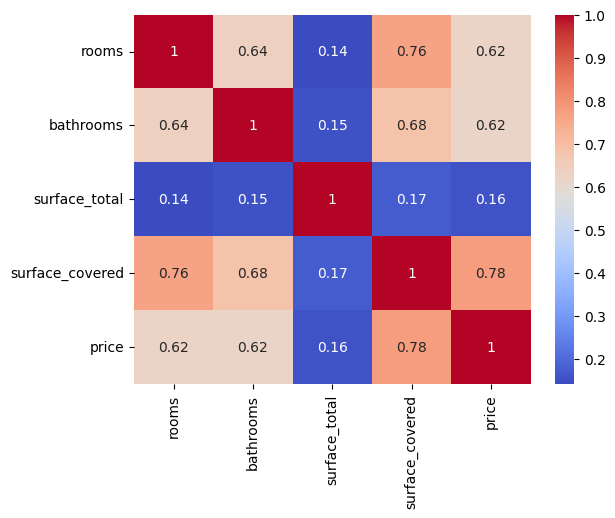

In [ ]:
sns.heatmap(base_correlacion.corr(), annot=True, cmap='coolwarm')

Respuesta 3.a) Podemos ver una correlacion positiva entre habitaciones y baños , pero no parece haber una buena correlacion entre la cantidad total de Metros y los metros cubiertos, esto se genera por los outliers que tiene el dataset.

3.b)	¿Cómo es la correlación de la variable a explicar, price, con el resto de las variables?

podemos ver una correlación positiva entre el precio , las habitafciones , los baños y los metros cubiertos. Llama la atencion que no parece haber una correlacion grande con los metros totales, esto se debe, como aclaramos en el punto anterior por los outliers.

3.c) Obtener estadísticas descriptivas para la variable target (price) y realizar un histograma de la misma. Comente los resultados obtenidos.

In [ ]:
##estadistica descriptiva de price
print("estadistica descriptiva de Price")
base_E10PorPropiedad['price'].describe().round(2)

estadistica descriptiva de Price


,price
count,6048.00
mean,235510.50
std,129774.96
min,45000.00
25%,145000.00
50%,199500.00
75%,299924.75
max,1575000.00


In [ ]:
precio_prom = base_E10PorPropiedad['price'].mean()
print(f"El precio promedio de la base completa es: ${precio_prom:,.2f}")

El precio promedio de la base completa es: $235,510.50


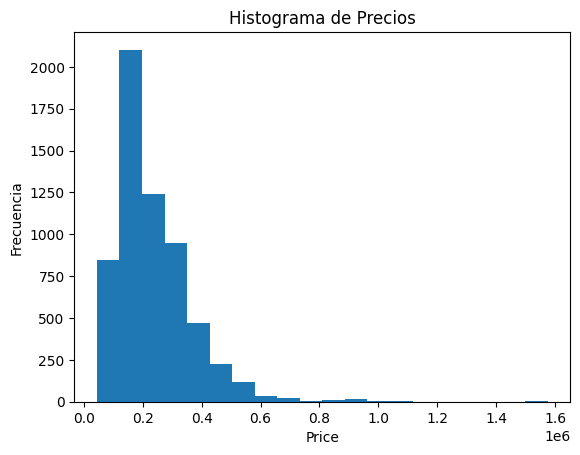

In [ ]:
#histograma de price
plt.hist(base_E10PorPropiedad['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

Gracias al Histograma podemos ver una asimetria positiva (la mayor parte de los datos se encuentran a la izquierda de la distribucion ) , eso se da porque la base con la que estamos trabajando posee outlier, los cuales vamos a eliminar despues de realizar un analisis de las variables por tipo de propiedad.

# **3.d) Analisis por tipo de propiedad**


# Consigna 3.d) **Analisis exploratorio Casas**


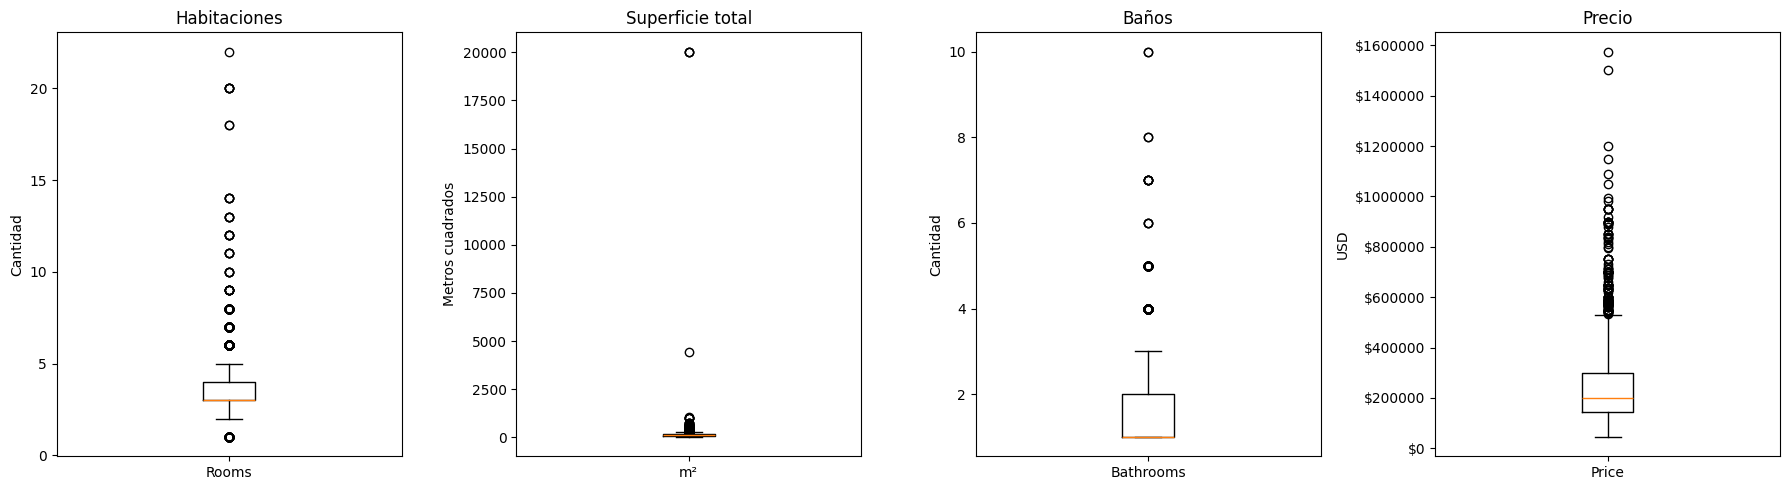

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_E10PorPropiedad['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_E10PorPropiedad['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_E10PorPropiedad['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_E10PorPropiedad['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Estos gráficos los creamos para poder ver los outlier de las casas y a partir de esta informacion filtrar el dataset

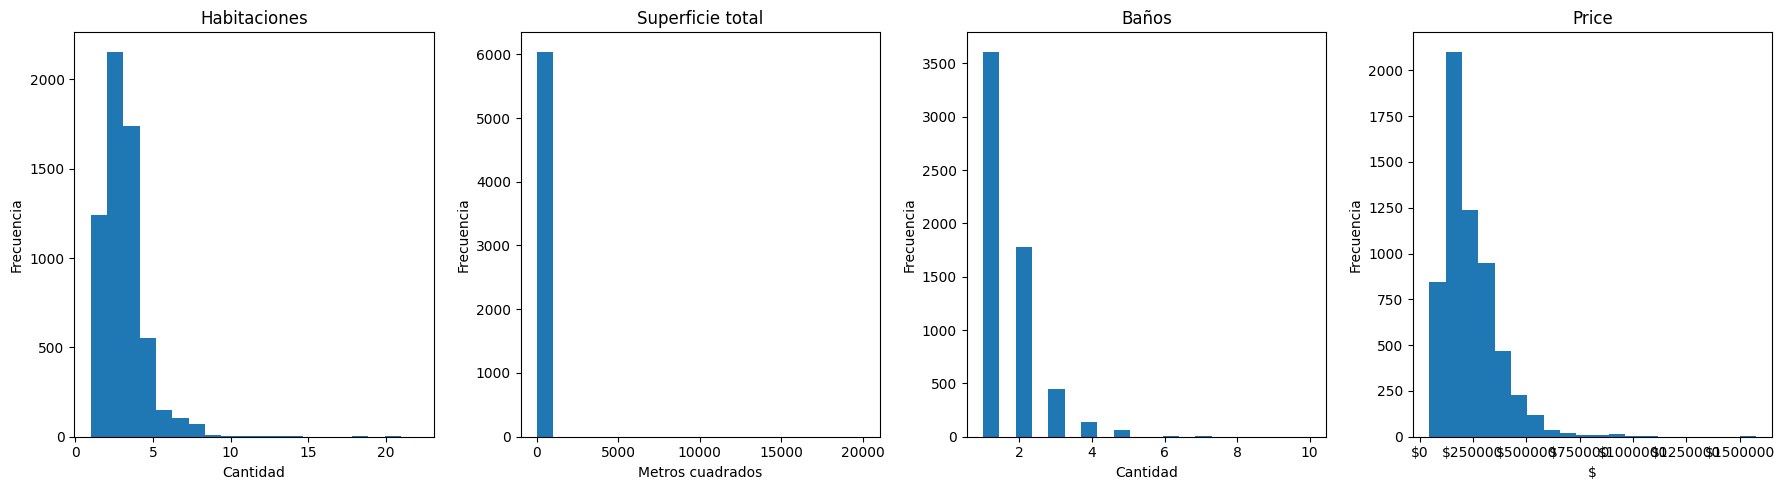

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_E10PorPropiedad['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_E10PorPropiedad['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_E10PorPropiedad['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_E10PorPropiedad['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_E10PorPropiedad.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_E10PorPropiedad.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_E10PorPropiedad.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 25 m2, por ejemplo)
group_surface = base_E10PorPropiedad.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 10 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
1.0       90
2.0     1149
3.0     2155
4.0     1737
5.0      553
6.0      151
7.0      106
8.0       70
9.0        8
10.0       4
11.0       4
12.0       5
13.0       4
14.0       4
18.0       2
20.0       5
22.0       1
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0     3610
2.0     1779
3.0      451
4.0      136
5.0       59
6.0        3
7.0        6
8.0        2
10.0       2
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 10 m2):
surface_total_rango
0          10
25        443
50       1516
75       1013
100       909
125       701
150       432
175       258
200       206
225       137
250        97
275        34
300       106
325        20
350        23
375         3
400         6
425        12
450         8
475         1
500        90
550         1
600         5
625         1
650         1
700         1
725         4
1000        5
1025        1
4400        1
20025       

/tmp/ipython-input-31-572166269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size


In [ ]:
# Filtrado de base según condiciones
filtro = (
    (base_E10PorPropiedad['rooms'] <= 7) &
    (base_E10PorPropiedad['rooms'] >= 2) &
    (base_E10PorPropiedad['surface_total'] <= 560) &
    (base_E10PorPropiedad['surface_total'] >= 50) &
    (base_E10PorPropiedad['surface_covered'] <= base_E10PorPropiedad['surface_total']) &
    (base_E10PorPropiedad['bathrooms'] <= 4) &
    (base_E10PorPropiedad['bathrooms'] >= 1) &
    (base_E10PorPropiedad['price'] <= 1000000) &
    (base_E10PorPropiedad['price'] >= 90000)
)

# Aplicar filtro
base_filtrada = base_E10PorPropiedad[filtro]

# Ver primeras filas
base_filtrada.head()


,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description,price_bucket
646,2021-11-02,-34.587448,-58.439880,Capital Federal,Palermo,PH,3.0,1.0,80,1,165000,Muy buen ph en segundo piso por escalera sin e...,160000
720,2017-10-19,-34.586748,-58.439285,Capital Federal,Palermo,PH,4.0,2.0,126,106,320000,Lindísimo PH al frente primer piso por escaler...,320000
737,2017-08-21,-34.586878,-58.439253,Capital Federal,Palermo,PH,4.0,2.0,199,199,504000,Corredor Responsable Lucas Federico Delgado C...,500000
738,2020-02-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,220000,Apto crédito PH de 3 ambientes al frente 2º pi...,220000
769,2019-02-27,-34.587674,-58.440163,Capital Federal,Palermo,PH,3.0,1.0,232,122,330000,HERMOSO PH RECICLADO 3 AMB CON TERRAZA PROPIA ...,330000


In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_filtrada.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_filtrada.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_filtrada.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 10 m2, por ejemplo)
group_surface = base_filtrada.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 25 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
2.0     753
3.0    2061
4.0    1719
5.0     543
6.0     144
7.0     105
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0    3039
2.0    1733
3.0     438
4.0     115
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 25 m2):
surface_total_rango
50     1423
75      983
100     903
125     697
150     427
175     244
200     193
225      95
250      92
275      34
300     101
325      13
350      14
375       3
400       4
425       8
450       4
500      87
Name: price, dtype: int64

Cantidad de publicaciones por Precio (rango de 10mil U$D):
price_bucket
90000     103
100000     82
110000    162
120000    251
130000    250
         ... 
850000      2
890000      9
920000      1
950000      2
980000      1
Name: price, Length: 71, dtype: int64


/tmp/ipython-input-33-560977034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size


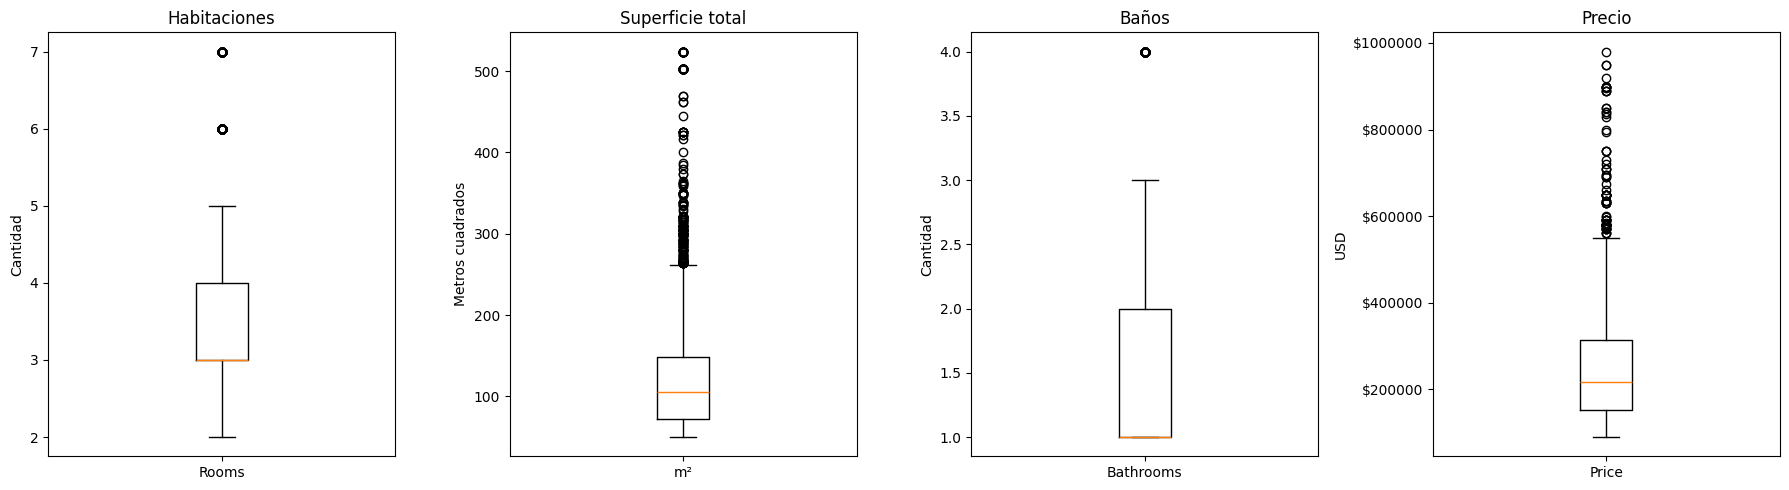

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_filtrada['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_filtrada['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_filtrada['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_filtrada['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Despues de los filtros que aplicamos podemos ver como los datos de las casas se distribuyen de mejor forma

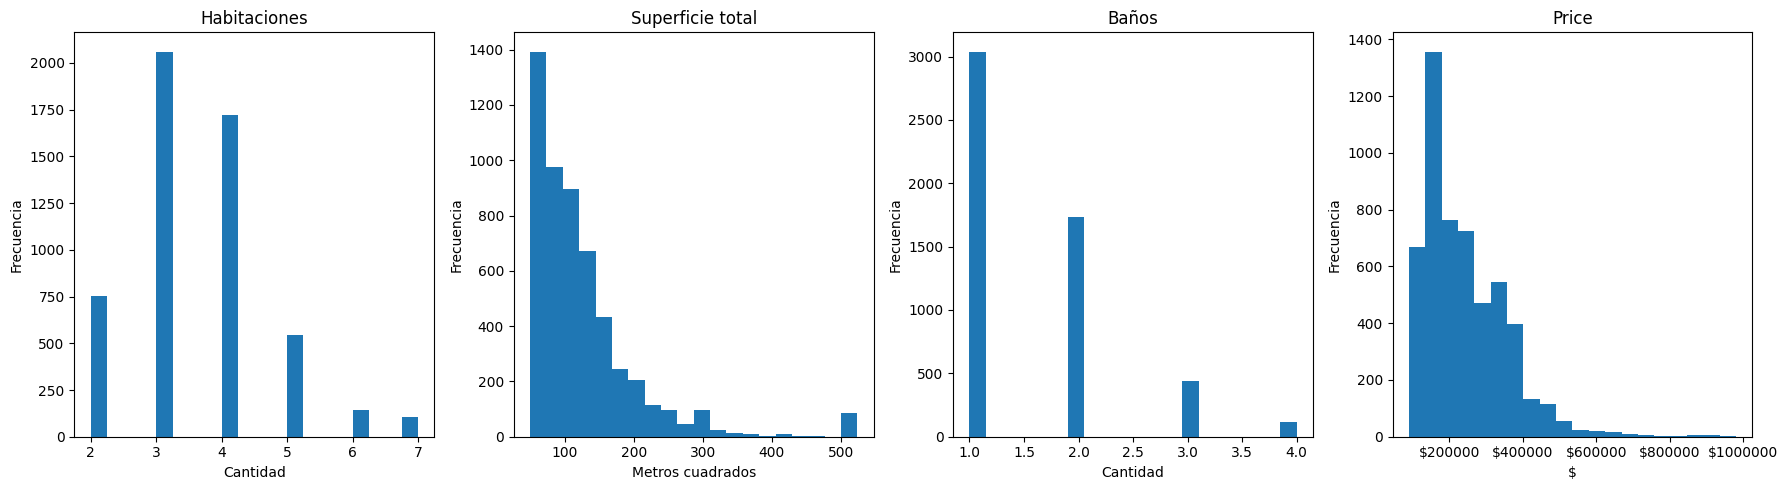

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_filtrada['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_filtrada['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_filtrada['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_filtrada['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

deberiamos ir filtrando la base pero por tipo de propiedad, para no descartar informacion necesaria para el modelo.

In [ ]:
# Cantidad de observaciones antes del filtro
original_count = base_E10PorPropiedad.shape[0]

# Cantidad de observaciones después del filtro
filtered_count = base_filtrada.shape[0]

print(f"Observaciones antes del filtro: {original_count}")
print(f"Observaciones después del filtro: {filtered_count}")
print(f"Observaciones eliminadas: {original_count - filtered_count}")
print(f"Observaciones eliminadas %: {(original_count - filtered_count) / original_count * 100}%")
base_filtradaCasa = base_filtrada

Observaciones antes del filtro: 6048
Observaciones después del filtro: 5325
Observaciones eliminadas: 723
Observaciones eliminadas %: 11.954365079365079%


# Consigna 3.d) **Analisis exploratorio Depto**


Obtener la matriz de correlaciones para las variables numéricas (ignore lat y lon). ¿Qué puede decir acerca de la correlación entre surface_total y surface_covered? ¿y entre rooms y bathrooms?


In [ ]:
base_correlacion = base_E10PorPropiedad.drop(['lat', 'lon','l2','l3','prop_type','created_on', 'description'], axis=1)
base_correlacion.head()

,rooms,bathrooms,surface_total,surface_covered,price,price_bucket
646,3.0,1.0,80,1,165000,160000
720,4.0,2.0,126,106,320000,320000
737,4.0,2.0,199,199,504000,500000
738,3.0,1.0,120,81,220000,220000
769,3.0,1.0,232,122,330000,330000


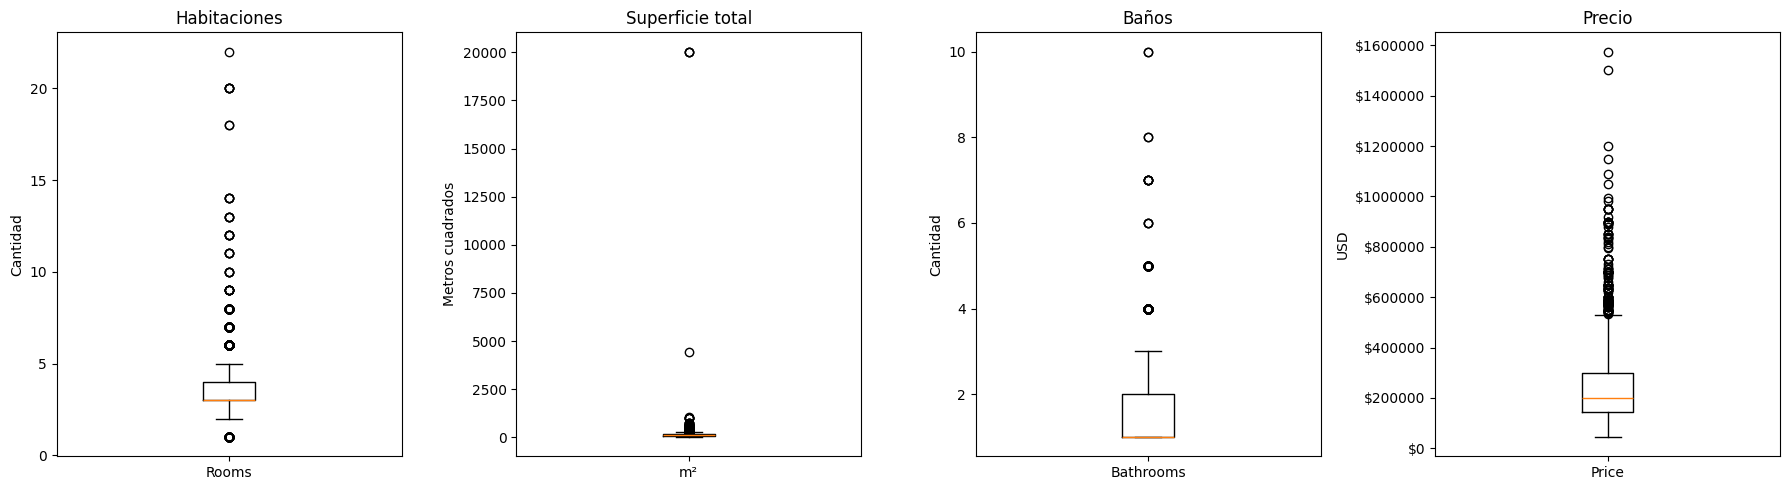

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_E10PorPropiedad['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_E10PorPropiedad['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_E10PorPropiedad['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_E10PorPropiedad['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Estos gráficos los creamos para poder ver los outlier de los departamentos y a partir de esta informacion filtrar el dataset


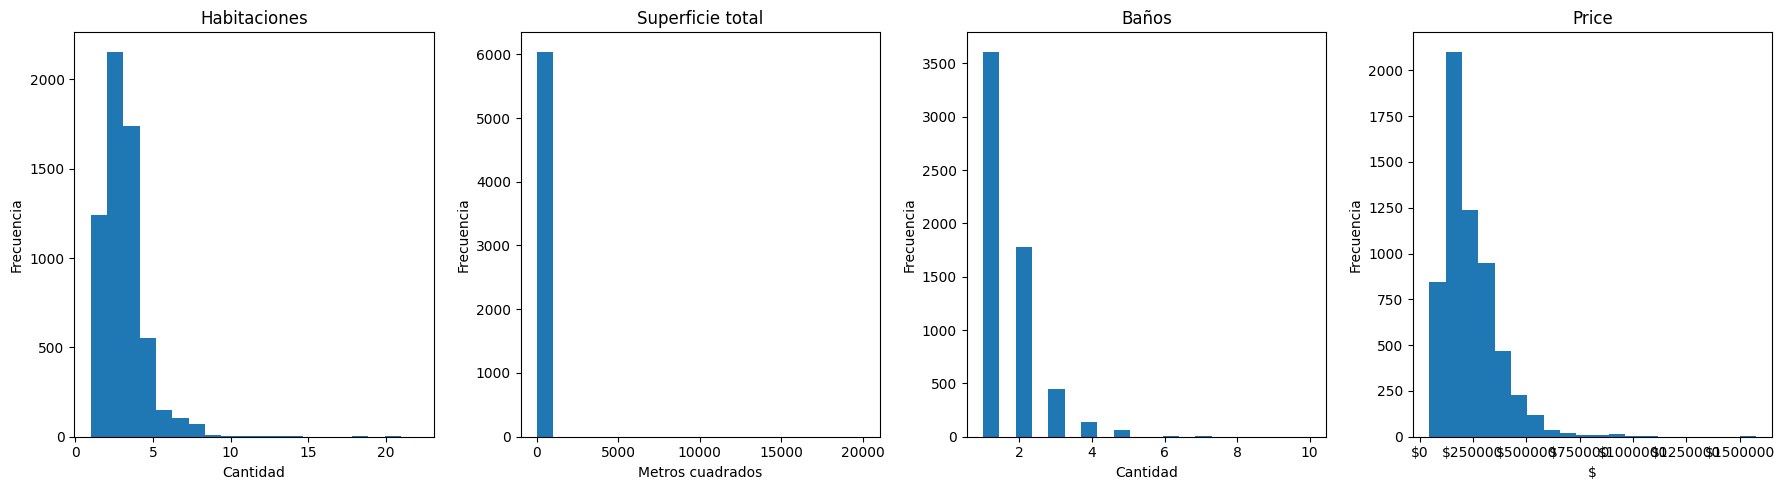

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_E10PorPropiedad['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_E10PorPropiedad['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_E10PorPropiedad['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_E10PorPropiedad['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_E10PorPropiedad.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_E10PorPropiedad.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_E10PorPropiedad.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 25 m2, por ejemplo)
group_surface = base_E10PorPropiedad.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 10 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
1.0       90
2.0     1149
3.0     2155
4.0     1737
5.0      553
6.0      151
7.0      106
8.0       70
9.0        8
10.0       4
11.0       4
12.0       5
13.0       4
14.0       4
18.0       2
20.0       5
22.0       1
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0     3610
2.0     1779
3.0      451
4.0      136
5.0       59
6.0        3
7.0        6
8.0        2
10.0       2
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 10 m2):
surface_total_rango
0          10
25        443
50       1516
75       1013
100       909
125       701
150       432
175       258
200       206
225       137
250        97
275        34
300       106
325        20
350        23
375         3
400         6
425        12
450         8
475         1
500        90
550         1
600         5
625         1
650         1
700         1
725         4
1000        5
1025        1
4400        1
20025       

/tmp/ipython-input-40-572166269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size


In [ ]:
# Filtrado de base según condiciones
filtro = (
    (base_E10PorPropiedad['rooms'] <= 4) &
    (base_E10PorPropiedad['rooms'] >= 1) &
    (base_E10PorPropiedad['surface_total'] <= 140) &
    (base_E10PorPropiedad['surface_total'] >= 30) &
    (base_E10PorPropiedad['surface_covered'] <= base_E10PorPropiedad['surface_total']) &
    (base_E10PorPropiedad['bathrooms'] <= 3) &
    (base_E10PorPropiedad['bathrooms'] >= 1) &
    (base_E10PorPropiedad['price'] <= 500000) &
    (base_E10PorPropiedad['price'] >= 50000)
)

# Aplicar filtro
base_filtrada = base_E10PorPropiedad[filtro]

# Ver primeras filas
base_filtrada.head()


,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description,price_bucket
646,2021-11-02,-34.587448,-58.439880,Capital Federal,Palermo,PH,3.0,1.0,80,1,165000,Muy buen ph en segundo piso por escalera sin e...,160000
720,2017-10-19,-34.586748,-58.439285,Capital Federal,Palermo,PH,4.0,2.0,126,106,320000,Lindísimo PH al frente primer piso por escaler...,320000
738,2020-02-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,220000,Apto crédito PH de 3 ambientes al frente 2º pi...,220000
837,2020-09-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,190000,Apto crédito PH de 3 ambientes al frente 2o pi...,190000
1562,2016-03-03,-34.632121,-58.429674,Capital Federal,Boedo,PH,2.0,1.0,125,50,125000,ESPECTACULAR PH DE 2 AMBIENTES CON PATIO Y TER...,120000


In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_filtrada.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_filtrada.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_filtrada.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 10 m2, por ejemplo)
group_surface = base_filtrada.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 25 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
1.0      74
2.0    1127
3.0    1903
4.0     956
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0    3141
2.0     865
3.0      54
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 25 m2):
surface_total_rango
25      429
50     1504
75      980
100     833
125     314
Name: price, dtype: int64

Cantidad de publicaciones por Precio (rango de 10mil U$D):
price_bucket
50000      10
60000      22
70000      65
80000     108
90000     167
100000    148
110000    214
120000    324
130000    270
140000    402
150000    306
160000    258
170000    165
180000    126
190000    171
200000     56
210000    124
220000    114
230000    190
240000     99
250000     92
260000     63
270000     80
280000     36
290000     62
300000     10
310000     19
320000     87
330000     64
340000     46
350000     24
360000     10
370000     28
380000      7
390000     30
400000     42
410000      3
420000   

/tmp/ipython-input-42-560977034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size


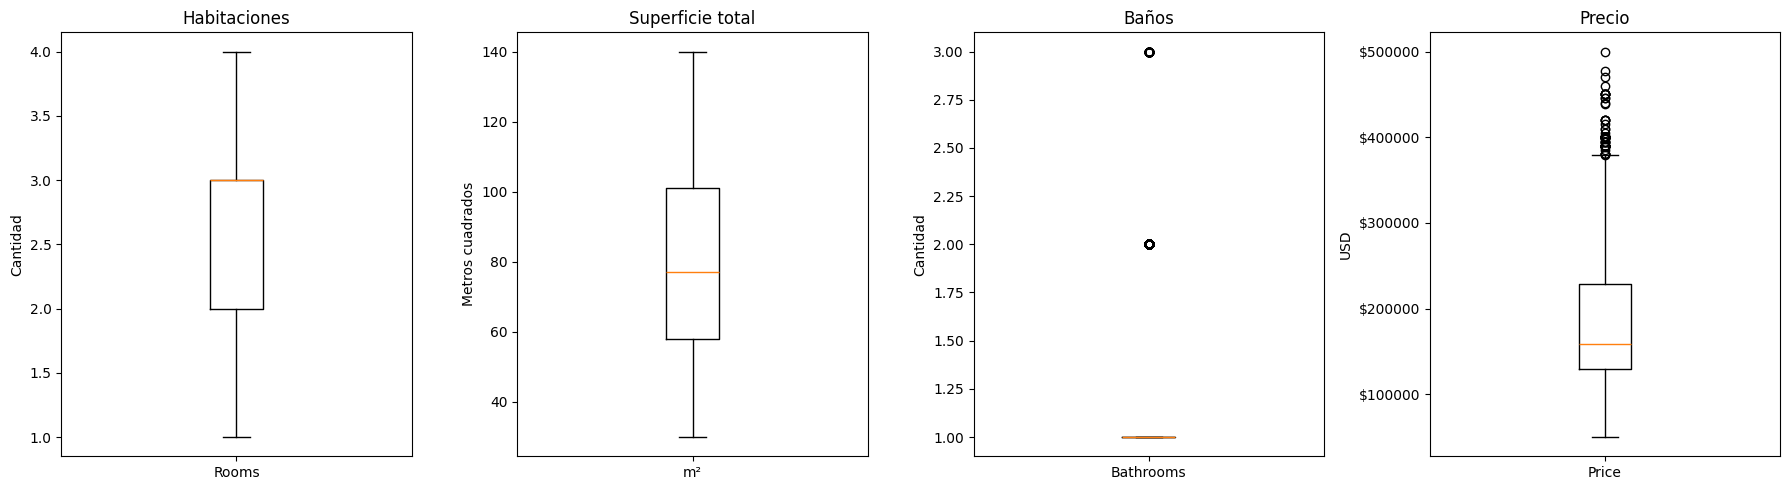

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_filtrada['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_filtrada['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_filtrada['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_filtrada['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Después de los filtros que aplicamos podemos ver como los datos de los departamentos se distribuyen de mejor forma

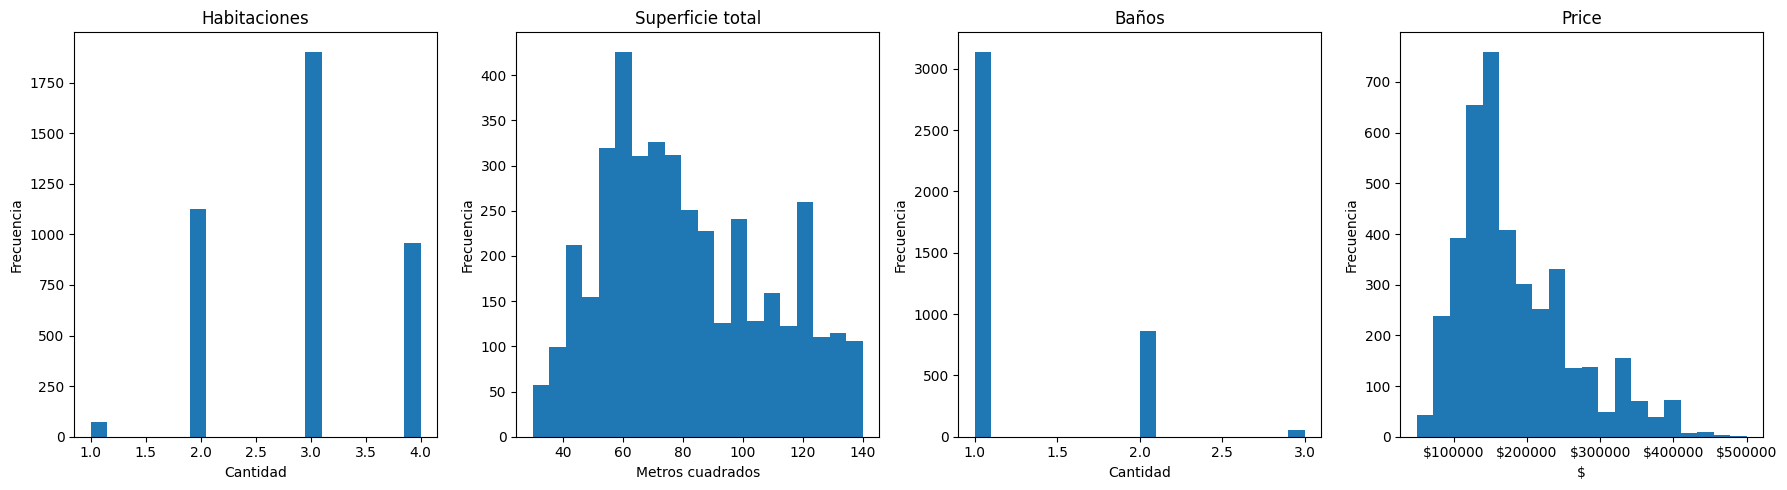

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_filtrada['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_filtrada['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_filtrada['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_filtrada['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

deberiamos ir filtrando la base pero por tipo de propiedad, para no descartar informacion necesaria para el modelo.

In [ ]:
# Cantidad de observaciones antes del filtro
original_count = base_E10PorPropiedad.shape[0]

# Cantidad de observaciones después del filtro
filtered_count = base_filtrada.shape[0]

print(f"Observaciones antes del filtro: {original_count}")
print(f"Observaciones después del filtro: {filtered_count}")
print(f"Observaciones eliminadas: {original_count - filtered_count}")
print(f"Observaciones eliminadas %: {(original_count - filtered_count) / original_count * 100}%")
base_filtradaDepto = base_filtrada

Observaciones antes del filtro: 6048
Observaciones después del filtro: 4060
Observaciones eliminadas: 1988
Observaciones eliminadas %: 32.870370370370374%


# Consigna 3.d) **Analisis exploratorio PH**


Obtener la matriz de correlaciones para las variables numéricas (ignore lat y lon). ¿Qué puede decir acerca de la correlación entre surface_total y surface_covered? ¿y entre rooms y bathrooms?


In [ ]:
base_correlacion = base_E10PorPropiedad.drop(['lat', 'lon','l2','l3','prop_type','created_on', 'description'], axis=1)
base_correlacion.head()

,rooms,bathrooms,surface_total,surface_covered,price,price_bucket
646,3.0,1.0,80,1,165000,160000
720,4.0,2.0,126,106,320000,320000
737,4.0,2.0,199,199,504000,500000
738,3.0,1.0,120,81,220000,220000
769,3.0,1.0,232,122,330000,330000


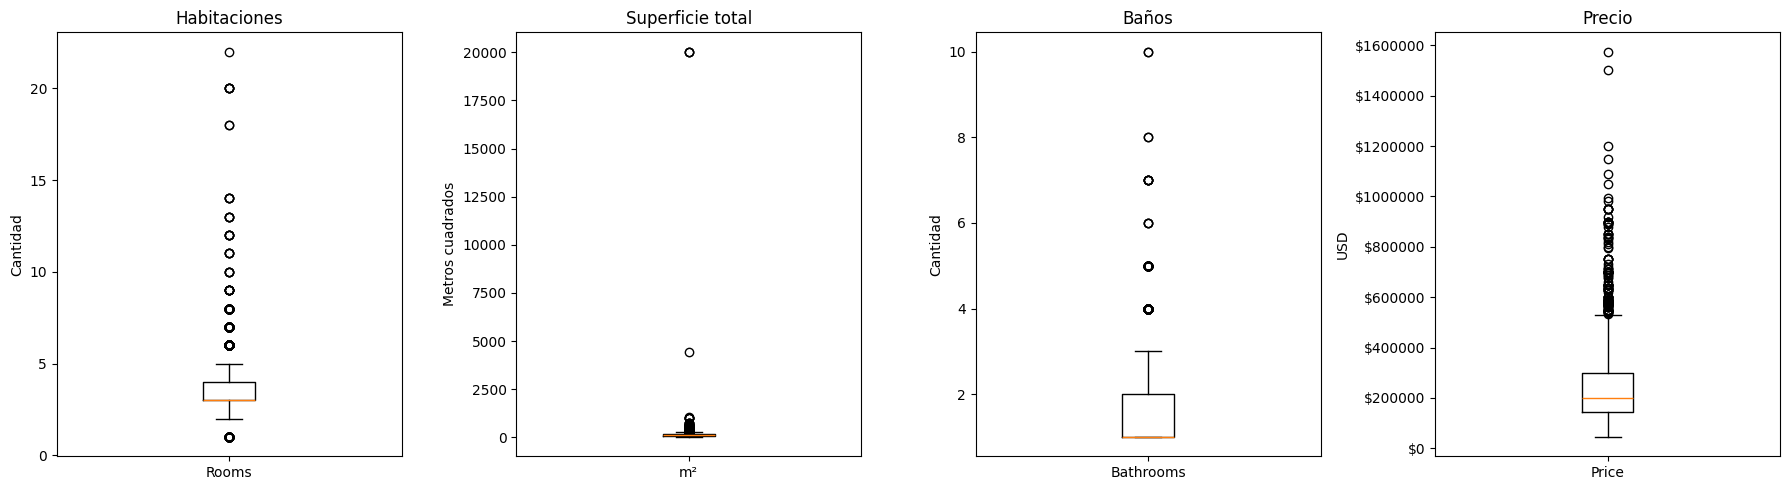

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_E10PorPropiedad['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_E10PorPropiedad['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_E10PorPropiedad['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_E10PorPropiedad['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Estos gráficos los creamos para poder ver los outlier de los PHs y a partir de esta información filtrar el dataset

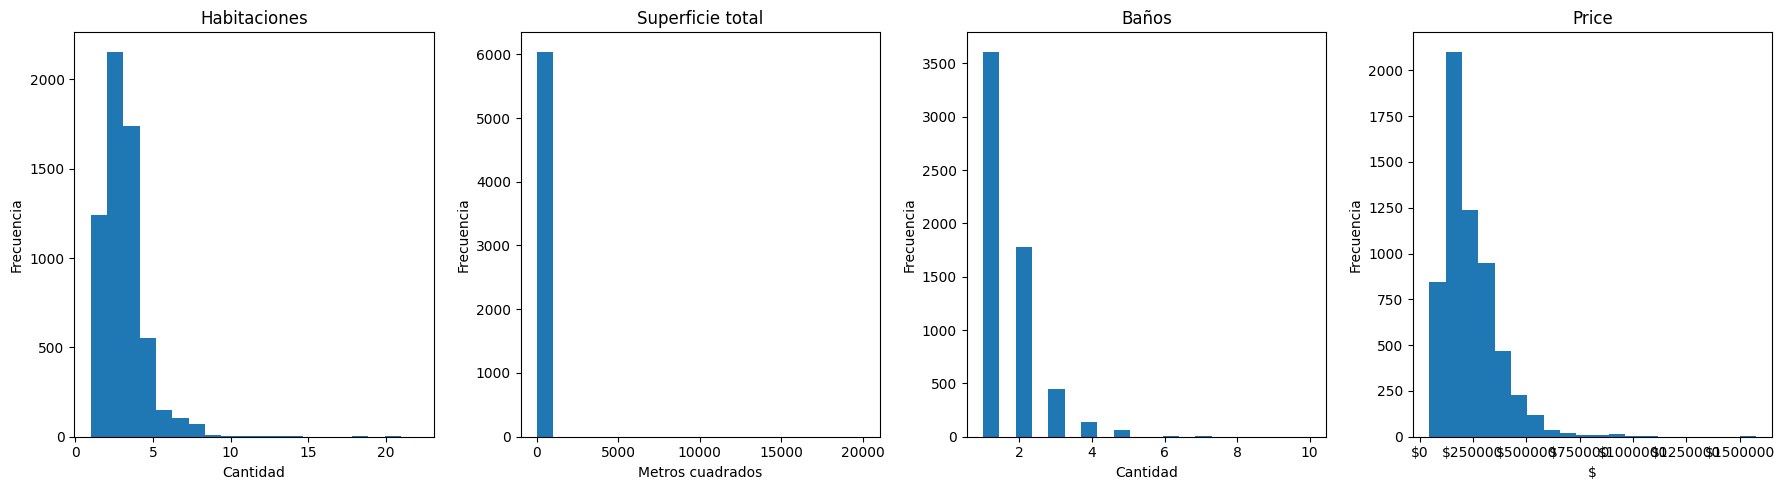

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_E10PorPropiedad['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_E10PorPropiedad['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_E10PorPropiedad['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_E10PorPropiedad['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_E10PorPropiedad.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_E10PorPropiedad.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_E10PorPropiedad.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 25 m2, por ejemplo)
group_surface = base_E10PorPropiedad.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 10 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
1.0       90
2.0     1149
3.0     2155
4.0     1737
5.0      553
6.0      151
7.0      106
8.0       70
9.0        8
10.0       4
11.0       4
12.0       5
13.0       4
14.0       4
18.0       2
20.0       5
22.0       1
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0     3610
2.0     1779
3.0      451
4.0      136
5.0       59
6.0        3
7.0        6
8.0        2
10.0       2
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 10 m2):
surface_total_rango
0          10
25        443
50       1516
75       1013
100       909
125       701
150       432
175       258
200       206
225       137
250        97
275        34
300       106
325        20
350        23
375         3
400         6
425        12
450         8
475         1
500        90
550         1
600         5
625         1
650         1
700         1
725         4
1000        5
1025        1
4400        1
20025       

/tmp/ipython-input-59-572166269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_E10PorPropiedad['price_bucket'] = (base_E10PorPropiedad['price'] // bucket_size) * bucket_size


In [ ]:
# Filtrado de base según condiciones
filtro = (
    (base_E10PorPropiedad['rooms'] <= 5) &
    (base_E10PorPropiedad['rooms'] >= 2) &
    (base_E10PorPropiedad['surface_total'] <= 260) &
    (base_E10PorPropiedad['surface_total'] >= 30) &
    (base_E10PorPropiedad['bathrooms'] <= 3) &
    (base_E10PorPropiedad['bathrooms'] >= 1) &
    (base_E10PorPropiedad['surface_covered'] <= base_E10PorPropiedad['surface_total']) &
    (base_E10PorPropiedad['price'] <= 490000) &
    (base_E10PorPropiedad['price'] >= 50000)
)

# Aplicar filtro
base_filtrada = base_E10PorPropiedad[filtro]

# Ver primeras filas
base_filtrada.head()


,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description,price_bucket
646,2021-11-02,-34.587448,-58.439880,Capital Federal,Palermo,PH,3.0,1.0,80,1,165000,Muy buen ph en segundo piso por escalera sin e...,160000
720,2017-10-19,-34.586748,-58.439285,Capital Federal,Palermo,PH,4.0,2.0,126,106,320000,Lindísimo PH al frente primer piso por escaler...,320000
738,2020-02-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,220000,Apto crédito PH de 3 ambientes al frente 2º pi...,220000
769,2019-02-27,-34.587674,-58.440163,Capital Federal,Palermo,PH,3.0,1.0,232,122,330000,HERMOSO PH RECICLADO 3 AMB CON TERRAZA PROPIA ...,330000
837,2020-09-11,-34.587579,-58.440387,Capital Federal,Palermo,PH,3.0,1.0,120,81,190000,Apto crédito PH de 3 ambientes al frente 2o pi...,190000


In [ ]:
# Agrupar por cantidad de habitaciones
group_rooms = base_filtrada.groupby('rooms')['price'].count()

# Agrupar por cantidad de baños
group_bathrooms = base_filtrada.groupby('bathrooms')['price'].count()

# Definir tamaño del bucket
bucket_size = 10000

# Crear columna con el rango al que pertenece cada precio
base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size

# Agrupar por ese bucket y contar
group_price_bucket = base_filtrada.groupby('price_bucket')['price'].count()

# Agrupar por superficie total redondeada (en rangos de 10 m2, por ejemplo)
group_surface = base_filtrada.copy()
group_surface['surface_total_rango'] = (group_surface['surface_total'] // 25) * 25
group_surface = group_surface.groupby('surface_total_rango')['price'].count()

# Mostrar las 3 matrices
print("Cantidad de publicaciones por habitaciones:")
print(group_rooms)

print("\nCantidad de publicaciones por baños:")
print(group_bathrooms)

print("\nCantidad de publicaciones por superficie (rango de 25 m2):")
print(group_surface)
print("\nCantidad de publicaciones por Precio (rango de 10mil U$D):")
print(group_price_bucket)


Cantidad de publicaciones por habitaciones:
rooms
2.0    1142
3.0    2128
4.0    1544
5.0     446
Name: price, dtype: int64

Cantidad de publicaciones por baños:
bathrooms
1.0    3432
2.0    1494
3.0     334
Name: price, dtype: int64

Cantidad de publicaciones por superficie (rango de 25 m2):
surface_total_rango
25      381
50     1501
75      979
100     892
125     675
150     397
175     188
200     147
225      67
250      33
Name: price, dtype: int64

Cantidad de publicaciones por Precio (rango de 10mil U$D):
price_bucket
50000       8
60000      20
70000      56
80000      95
90000     161
100000    145
110000    208
120000    316
130000    282
140000    411
150000    330
160000    284
170000    212
180000    159
190000    229
200000     71
210000    151
220000    173
230000    234
240000    165
250000    127
260000    104
270000    127
280000     82
290000    130
300000     34
310000     40
320000    123
330000     96
340000    117
350000     82
360000     43
370000     84
38000

/tmp/ipython-input-61-560977034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada['price_bucket'] = (base_filtrada['price'] // bucket_size) * bucket_size


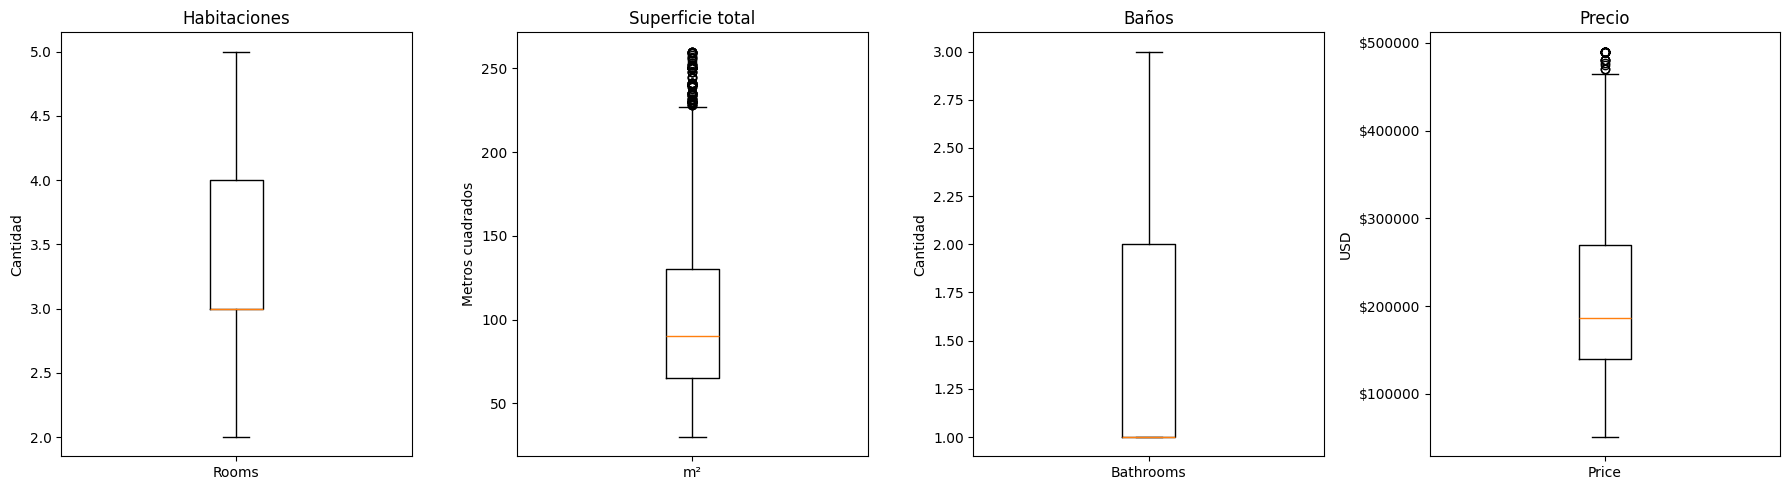

In [ ]:
# Formateador simple: solo agrega el símbolo $
def format_dollars(x, _):
    return f"${int(x)}"

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Boxplot de habitaciones
axs[0].boxplot(base_filtrada['rooms'].dropna())
axs[0].set_title('Habitaciones')
axs[0].set_ylabel('Cantidad')
axs[0].set_xticks([1])
axs[0].set_xticklabels(['Rooms'])

# Boxplot de superficie total
axs[1].boxplot(base_filtrada['surface_total'].dropna())
axs[1].set_title('Superficie total')
axs[1].set_ylabel('Metros cuadrados')
axs[1].set_xticks([1])
axs[1].set_xticklabels(['m²'])

# Boxplot de baños
axs[2].boxplot(base_filtrada['bathrooms'].dropna())
axs[2].set_title('Baños')
axs[2].set_ylabel('Cantidad')
axs[2].set_xticks([1])
axs[2].set_xticklabels(['Bathrooms'])

# Boxplot de precios
axs[3].boxplot(base_filtrada['price'].dropna())
axs[3].set_title('Precio')
axs[3].set_ylabel('USD')
axs[3].set_xticks([1])
axs[3].set_xticklabels(['Price'])

# Aplicar formato al eje Y como $simple
axs[3].yaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

Después de los filtros que aplicamos podemos ver como los datos de los PHs se distribuyen de mejor forma

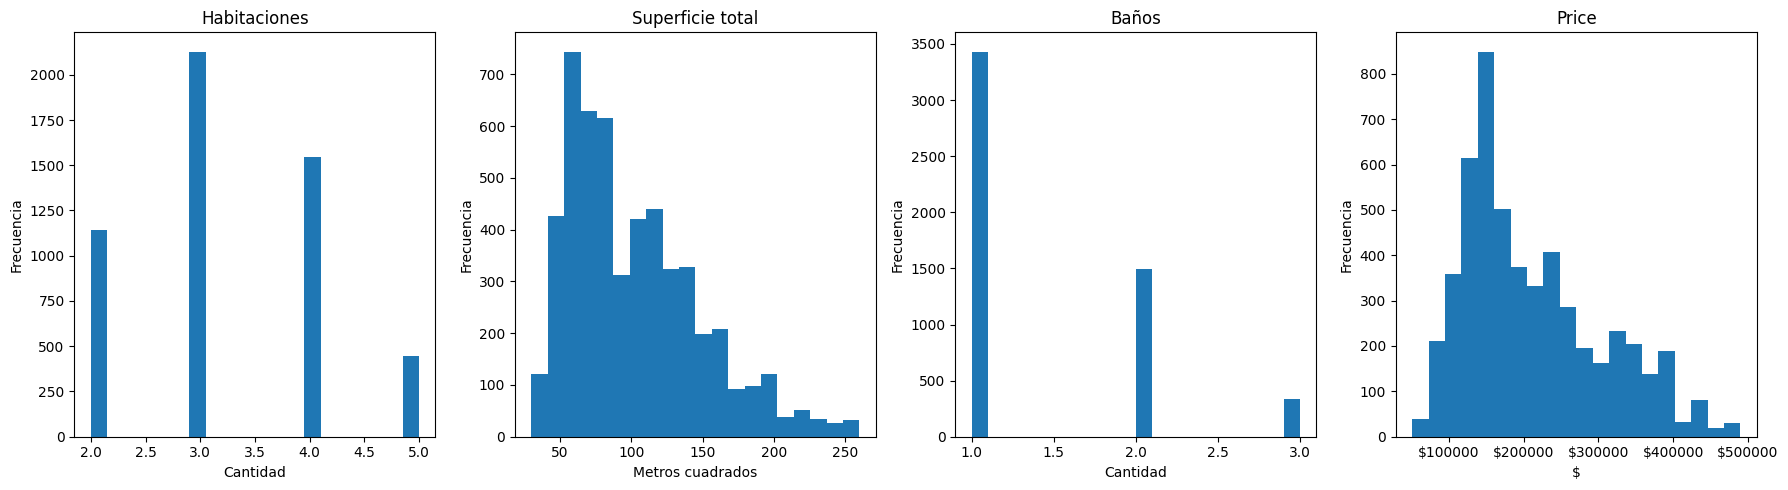

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))  # 1 fila, 3 columnas

# Histograma de habitaciones
axs[0].hist(base_filtrada['rooms'].dropna(), bins=20)
axs[0].set_title('Habitaciones')
axs[0].set_xlabel('Cantidad')
axs[0].set_ylabel('Frecuencia')

# Histograma de superficie total
axs[1].hist(base_filtrada['surface_total'].dropna(), bins=20)
axs[1].set_title('Superficie total')
axs[1].set_xlabel('Metros cuadrados')
axs[1].set_ylabel('Frecuencia')

# Histograma de baños
axs[2].hist(base_filtrada['bathrooms'].dropna(), bins=20)
axs[2].set_title('Baños')
axs[2].set_xlabel('Cantidad')
axs[2].set_ylabel('Frecuencia')

axs[3].hist(base_filtrada['price'].dropna(), bins=20)
axs[3].set_title('Price')
axs[3].set_xlabel('$')
axs[3].set_ylabel('Frecuencia')

# Aplicar formato al eje Y como $simple
axs[3].xaxis.set_major_formatter(FuncFormatter(format_dollars))

plt.tight_layout()
plt.show()

In [ ]:
# Cantidad de observaciones antes del filtro
original_count = base_E10PorPropiedad.shape[0]

# Cantidad de observaciones después del filtro
filtered_count = base_filtrada.shape[0]

print(f"Observaciones antes del filtro: {original_count}")
print(f"Observaciones después del filtro: {filtered_count}")
print(f"Observaciones eliminadas: {original_count - filtered_count}")
print(f"Observaciones eliminadas %: {(original_count - filtered_count) / original_count * 100}%")
base_filtradaPH = base_filtrada

Observaciones antes del filtro: 6048
Observaciones después del filtro: 5260
Observaciones eliminadas: 788
Observaciones eliminadas %: 13.029100529100528%


 3.e)	Graficar un scatterplot de la variable price y surface_total. ¿Detecta alguna anomalía?



---


# Consigna 3.f) **Data Completa Filtrada**

3.f)	Eliminar los outliers univariados de las variables price, rooms y surface_total. Utilizar y fundamentar el o los criterio/s y métodos que consideren adecuados. Deberá trabajar con este dataset filtrado en lo que resta del Trabajo Práctico.

A partir del analisis emploratorio por tipo de propiedad pudimos encontrar los valores que filtran los outliers, con esto vamos a preparar nuestra base filtrada.

In [ ]:
# Filtrar solo casas y aplicar su filtro
filtro_casa = (
    (base_E10['prop_type'] == 'Casa') &
    (base_E10['rooms'] <= 7) &
    (base_E10['rooms'] >= 2) &
    (base_E10['surface_total'] <= 560) &
    (base_E10['surface_total'] >= 50) &
    (base_E10['surface_covered'] <= base_E10['surface_total']) &
    (base_E10['bathrooms'] <= 4) &
    (base_E10['bathrooms'] >= 1) &
    (base_E10['price'] <= 1000000) &
    (base_E10['price'] >= 90000)
)
casas_filtradas = base_E10[filtro_casa]

# Filtrar departamentos con su filtro
filtro_depto = (
    (base_E10['prop_type'] == 'Departamento') &
    (base_E10['rooms'] <= 4) &
    (base_E10['rooms'] >= 1) &
    (base_E10['surface_total'] <= 140) &
    (base_E10['surface_total'] >= 30) &
    (base_E10['surface_covered'] <= base_E10['surface_total']) &
    (base_E10['bathrooms'] <= 3) &
    (base_E10['bathrooms'] >= 1) &
    (base_E10['price'] <= 500000) &
    (base_E10['price'] >= 50000)
)
deptos_filtrados = base_E10[filtro_depto]

# Filtrar PH con su filtro
filtro_ph = (
    (base_E10['prop_type'] == 'PH') &
    (base_E10['rooms'] <= 5) &
    (base_E10['rooms'] >= 2) &
    (base_E10['surface_total'] <= 260) &
    (base_E10['surface_total'] >= 30) &
    (base_E10['bathrooms'] <= 3) &
    (base_E10['bathrooms'] >= 1) &
    (base_E10['surface_covered'] <= base_E10['surface_total']) &
    (base_E10['price'] <= 490000) &
    (base_E10['price'] >= 50000)
)
ph_filtrados = base_E10[filtro_ph]

# Unir todos en un solo DataFrame
base_filtrada_final = pd.concat([casas_filtradas, deptos_filtrados, ph_filtrados], ignore_index=True)

# Verificar resultado
print("Cantidad de registros filtrados:", len(base_filtrada_final))
base_filtrada_final.head()


Cantidad de registros filtrados: 65061


,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
0,2020-05-05,-34.586777,-58.439281,Capital Federal,Palermo,Casa,3.0,2.0,164,120,290000,PH muy luminoso con muy lindo patio y muy bue...
1,2016-03-03,-34.632121,-58.429674,Capital Federal,Boedo,Casa,4.0,1.0,230,100,254500,SE TRATA DE 2 PH SOBRE TERRENO PROPIO AL FRENT...
2,2019-09-04,-34.574469,-58.423093,Capital Federal,Palermo,Casa,5.0,1.0,277,130,620000,GRAN PH CON ENTRADA INDIVIDUAL POR ESCALERA DE...
3,2017-10-06,-34.571150,-58.423297,Capital Federal,Palermo,Casa,2.0,2.0,70,70,370000,Casa de 2 ambientes en Palermo Living comedor ...
4,2017-10-06,-34.571150,-58.423297,Capital Federal,Palermo,Casa,4.0,2.0,180,120,369000,Casa de 4 ambientes en Palermo Living comedor ...


In [ ]:
base_filtrada_final

,created_on,lat,lon,l2,l3,prop_type,rooms,bathrooms,surface_total,surface_covered,price,description
0,2020-05-05,-34.586777,-58.439281,Capital Federal,Palermo,Casa,3.0,2.0,164,120,290000,PH muy luminoso con muy lindo patio y muy bue...
1,2016-03-03,-34.632121,-58.429674,Capital Federal,Boedo,Casa,4.0,1.0,230,100,254500,SE TRATA DE 2 PH SOBRE TERRENO PROPIO AL FRENT...
2,2019-09-04,-34.574469,-58.423093,Capital Federal,Palermo,Casa,5.0,1.0,277,130,620000,GRAN PH CON ENTRADA INDIVIDUAL POR ESCALERA DE...
3,2017-10-06,-34.571150,-58.423297,Capital Federal,Palermo,Casa,2.0,2.0,70,70,370000,Casa de 2 ambientes en Palermo Living comedor ...
4,2017-10-06,-34.571150,-58.423297,Capital Federal,Palermo,Casa,4.0,2.0,180,120,369000,Casa de 4 ambientes en Palermo Living comedor ...
...,...,...,...,...,...,...,...,...,...,...,...,...
65056,2021-02-20,-34.580073,-58.417418,Capital Federal,Palermo,PH,3.0,1.0,63,55,62000,Corredor Responsable Gilda F Clauso REG 3350C...
65057,2021-02-13,-34.580073,-58.417418,Capital Federal,Palermo,PH,3.0,1.0,63,55,62000,Corredor Responsable Gilda F Clauso REG 3350C...
65058,2021-03-31,-34.581735,-58.514471,Capital Federal,Villa Pueyrredón,PH,3.0,2.0,255,122,265000,Corredor Responsable Hernan Perrone CUCICBA 2...
65059,2020-07-30,-34.573563,-58.426385,Capital Federal,Palermo,PH,2.0,2.0,60,60,178000,Corredor Responsable Mónica Silvia Martinuzzi ...


---


# Consigna 3.e) **Scatterplot price**

3.e) Graficar un scatterplot de la variable price y surface_total. ¿Detecta alguna anomalía?

Lo corremos después del 3.f) para poder comparar contra la base filtrada y sacar conclusiones.

Text(0, 0.5, 'Precio')

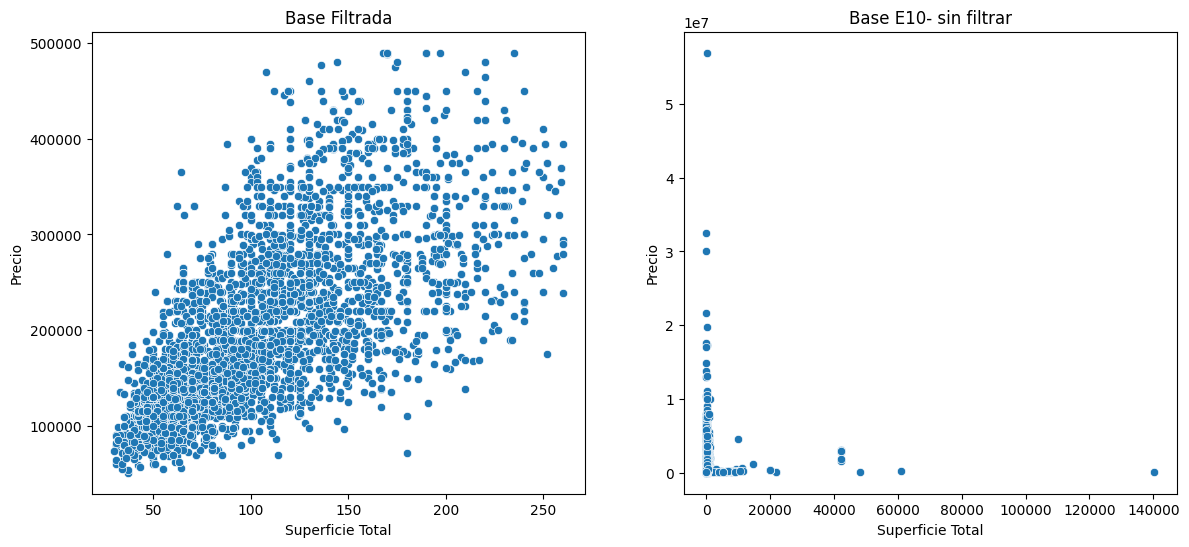

In [ ]:
# scatterplot entre variable price y surface_total
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='surface_total', y='price', data=base_filtrada, ax=axes[0])
axes[0].set_title('Base Filtrada')
axes[0].set_xlabel('Superficie Total')
axes[0].set_ylabel('Precio')

sns.scatterplot(x='surface_total', y='price', data=base_E10, ax=axes[1])
axes[1].set_title('Base E10- sin filtrar')
axes[1].set_xlabel('Superficie Total')
axes[1].set_ylabel('Precio')

Rta: Podemos visualizar mejor en la base filtrada (sin outliers) la correlacion positiva que existe entre precio y superficie total, correlacion que era de esperarse.

#Consigna 3.g) **correlacion e histograma**

3.g)	Vuelva a realizar la matriz de correlaciones y el histograma de la variable price. Comente los cambios observados si los hubiera.

In [ ]:
precio_promedio = base_filtrada_final['price'].mean()
print(f"El precio promedio de la base filtrada es: ${precio_promedio:,.2f}")

El precio promedio de la base filtrada es: $193,737.17


In [ ]:
##estadistica descriptiva de price en base filtrada
base_filtrada_final['price'].describe().round(2)

,price
count,65061.00
mean,193737.17
std,100090.46
min,50000.00
25%,122000.00
50%,165000.00
75%,240000.00
max,1000000.00


Analisando la distribucion de los precios en la base filtrada vemos que cambio la media (bajando de 235.510 a 193.737) tambien vemos una disminucion en los percentiles (25/50/75) y en el máximo , producto de los filtros utilizados para limpiar la base.

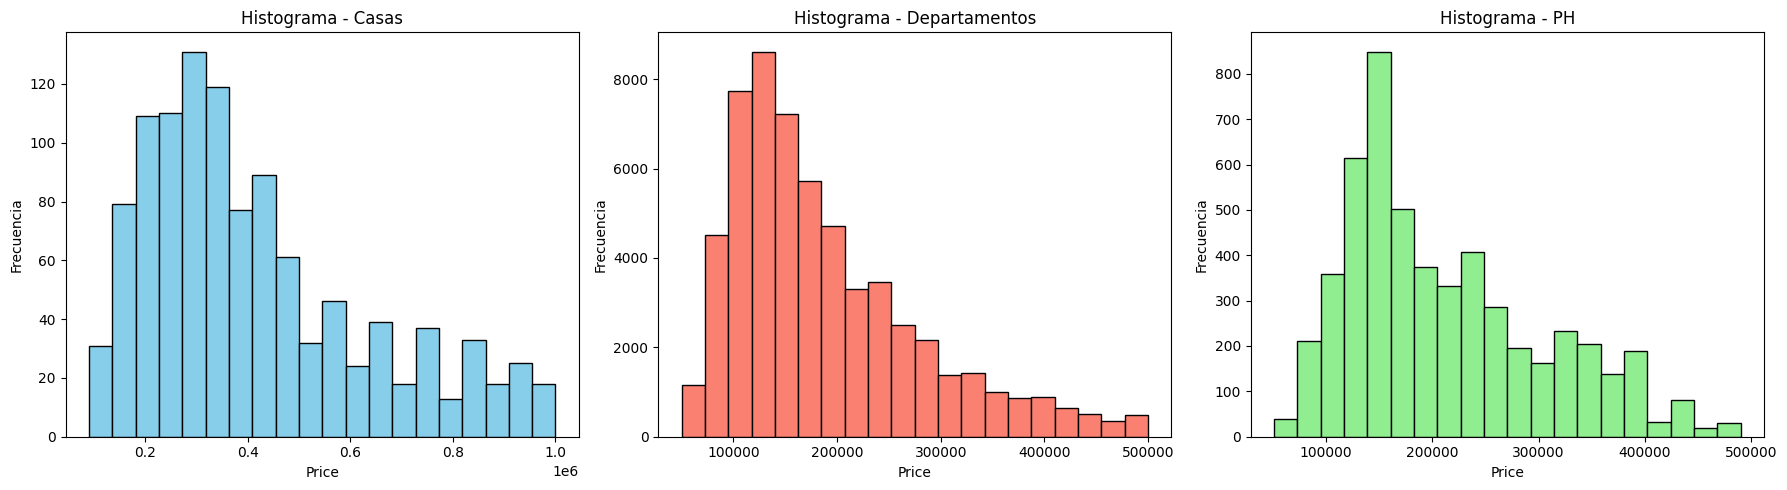

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(casas_filtradas['price'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma - Casas')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(deptos_filtrados['price'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma - Departamentos')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frecuencia')

axes[2].hist(ph_filtrados['price'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Histograma - PH')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

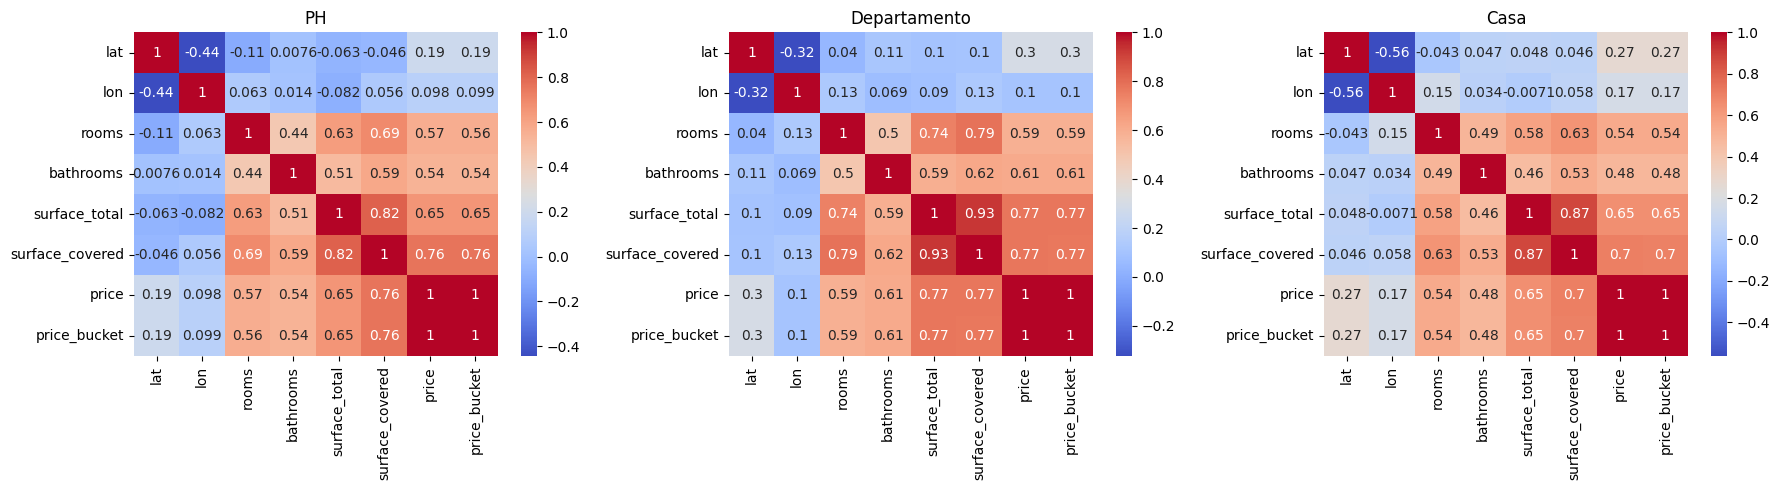

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

# Heatmap para PH
sns.heatmap(base_filtradaPH.corr(numeric_only=True), annot=True, ax=axs[0], cmap='coolwarm')
axs[0].set_title('PH')

# Heatmap para Departamento
sns.heatmap(base_filtradaDepto.corr(numeric_only=True), annot=True, ax=axs[1], cmap='coolwarm')
axs[1].set_title('Departamento')

# Heatmap para Casa
sns.heatmap(base_filtradaCasa.corr(numeric_only=True), annot=True, ax=axs[2], cmap='coolwarm')
axs[2].set_title('Casa')

plt.tight_layout()
plt.show()

Rta 3.g) A partir de los filtros utilizados para eliminar los outlier podemos ver una alta correlacion entre las variables Surface_Covered y Surface_total en los 3 tipos de propiedades.
En el caso de Rooms y bathrooms vemos que en los 3 casos tambien existe una relacion positiva pero a menor magnitud.

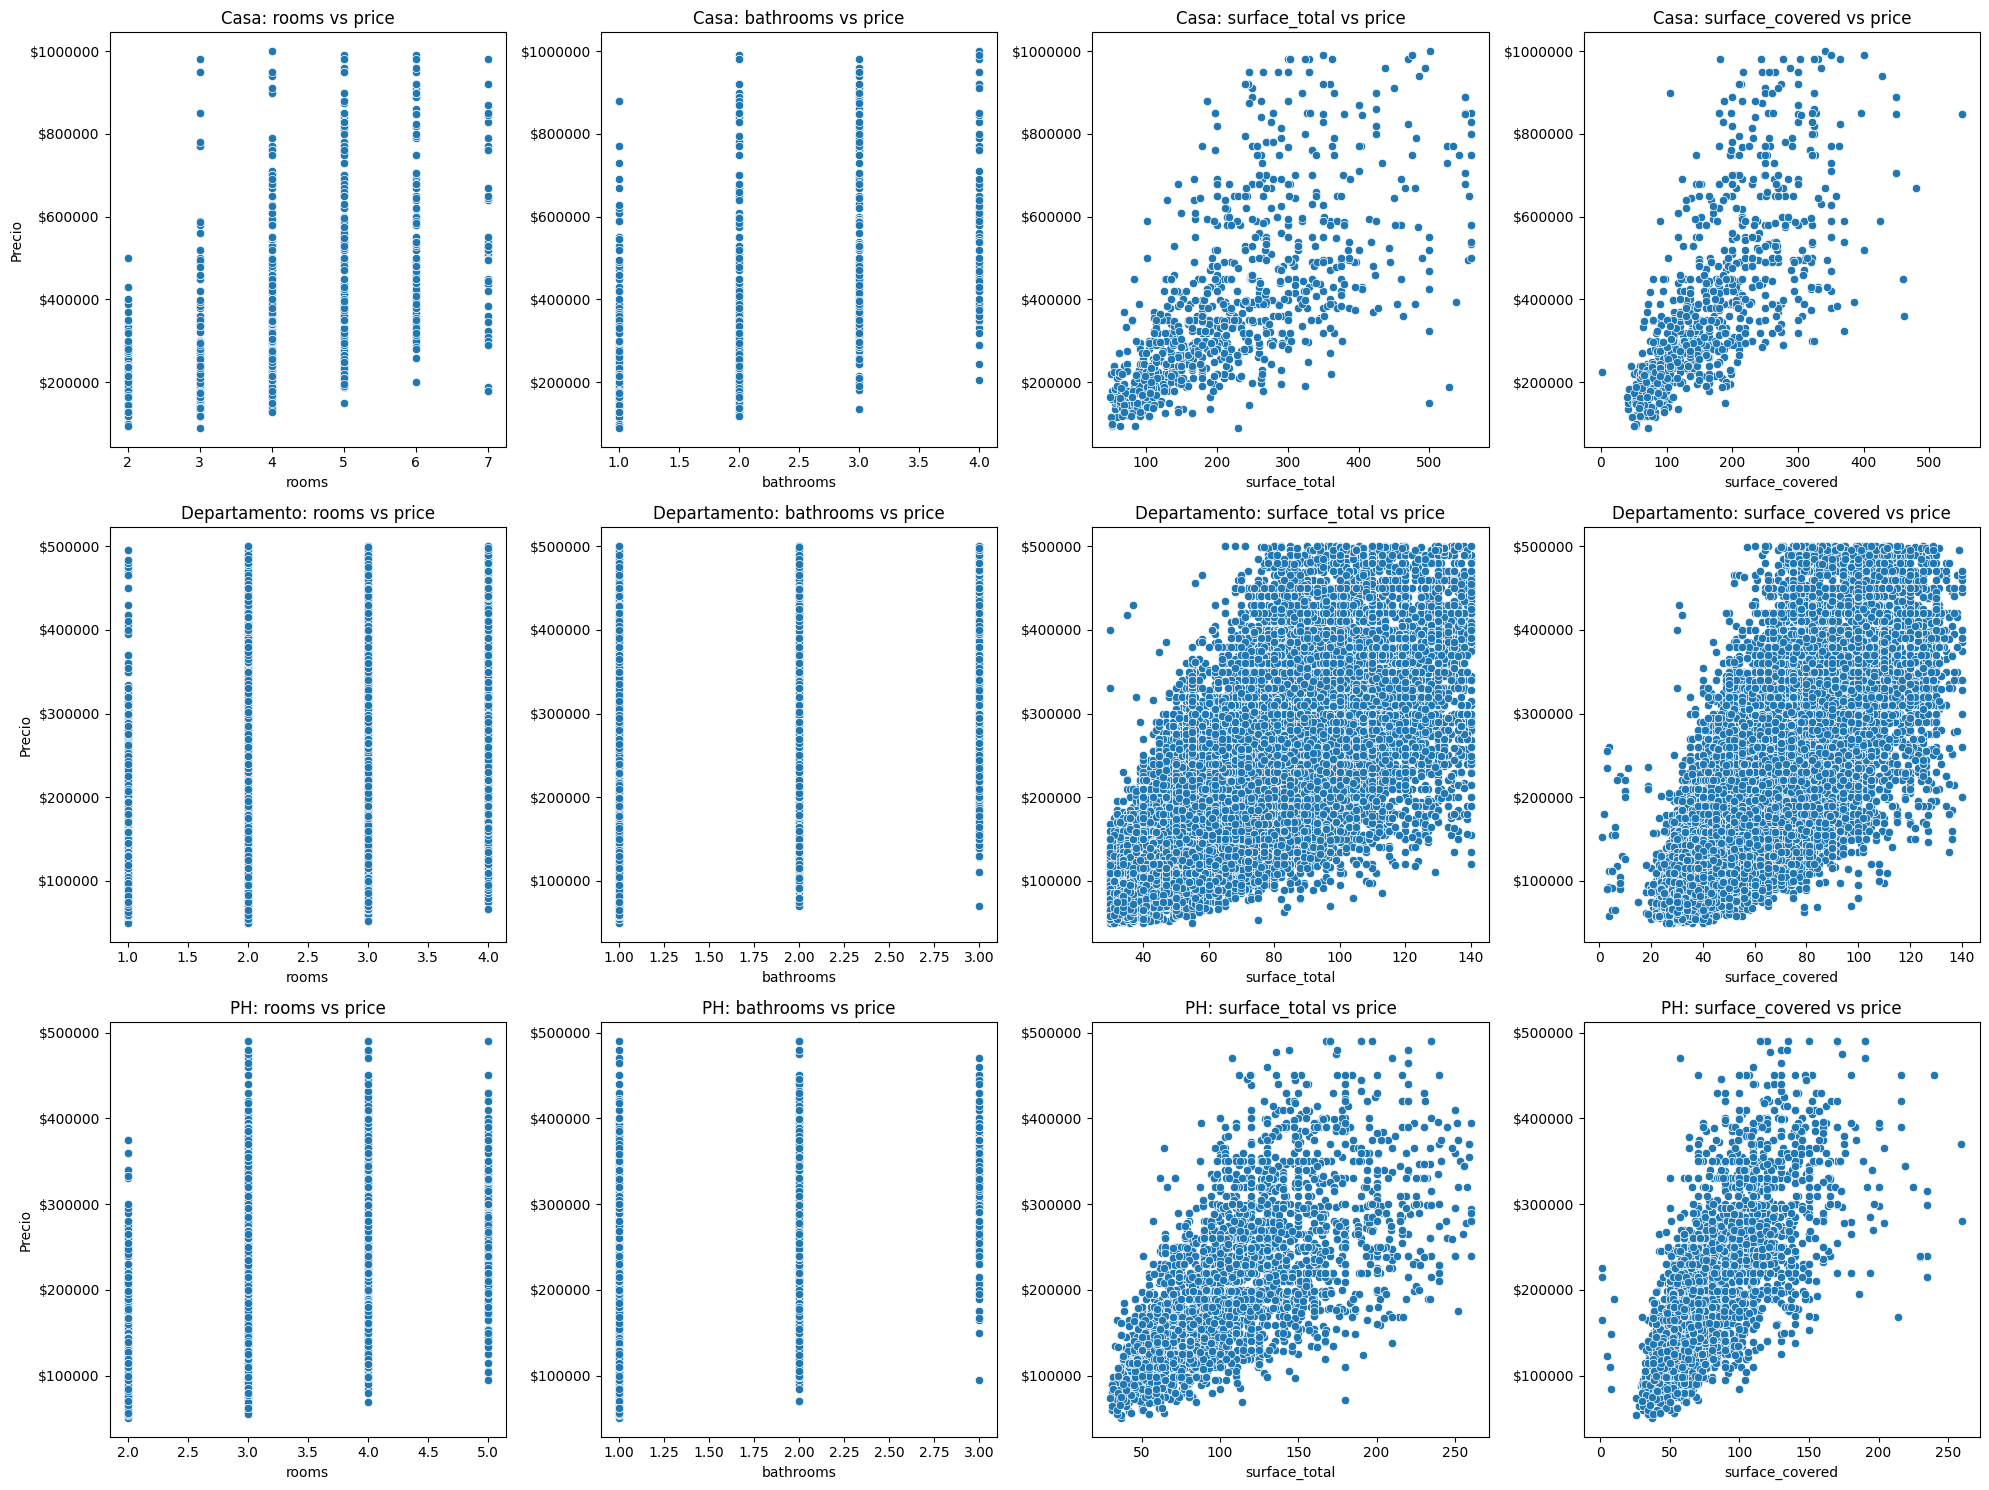

In [ ]:
# Formateador del eje Y en dólares
def format_dollars(x, _):
    return f"${int(x)}"

# Variables a comparar contra el precio
variables = ["rooms", "bathrooms", "surface_total", "surface_covered"]

# Bases a graficar
bases = [
    ("Casa", base_filtradaCasa),
    ("Departamento", base_filtradaDepto),
    ("PH", base_filtradaPH)
]

# Crear figura con subplots: una fila por base, una columna por variable
fig, axs = plt.subplots(len(bases), len(variables), figsize=(5 * len(variables), 5 * len(bases)))

for i, (titulo, base) in enumerate(bases):
    for j, var in enumerate(variables):
        ax = axs[i][j] if len(bases) > 1 else axs[j]

        if var in base.columns:
            sns.scatterplot(data=base, x=var, y="price", ax=ax)
            ax.set_title(f'{titulo}: {var} vs price')
            ax.set_xlabel(var)
            if j == 0:
                ax.set_ylabel('Precio')
            else:
                ax.set_ylabel('')
            # Formatear eje Y como dólares
            ax.yaxis.set_major_formatter(FuncFormatter(format_dollars))
        else:
            ax.axis('off')
            ax.set_title(f'{titulo}: sin "{var}"')

plt.tight_layout()
plt.show()

---


# Consigna 4) **Partición de conjunto de datos**

In [ ]:
numero_grupo = 10

# Separar en entrenamiento y prueba
train_set, test_set = train_test_split(
    base_filtrada_final,
    test_size=0.2,
    random_state=numero_grupo
)

print("Entrenamiento:", train_set.shape)
print("Prueba:", test_set.shape)

Entrenamiento: (52048, 12)
Prueba: (13013, 12)


Dividimos el tamaño del conjunto de datos a partir de plantar la semilla con el numero del grupo (10) , la funcion test_size es la que distribuye 80% de los datos para entrenamiento (train) y el 20% restante para prueba (testeo).
Esta division la vamos a usar sobre todo en los modelos de ML en el punto 6.



---


# Consigna 5) **Modelo Minimos Cuadrados Ordinarios**

In [ ]:
train_set = train_set.drop('description', axis=1)
test_set = test_set.drop('description', axis=1)

Como en el HeatMap vimos que Surface_covered estaba mas correlacionado que superficie total, usamos esa en lugar de total.

In [ ]:
modelo_lineal_superficie = smf.ols(formula="price ~ surface_covered + bathrooms + rooms + prop_type + l3 + surface_total * prop_type ", data=train_set)
res_lineal_superficie = modelo_lineal_superficie.fit()
summary_lineal_superficie = res_lineal_superficie.summary()
summary_lineal_superficie

predicciones_test = res_lineal_superficie.predict(test_set)
ml_mae = mean_absolute_error(test_set['price'], predicciones_test)
ml_rmse = np.sqrt(mean_squared_error(test_set['price'], predicciones_test))
mae_pct_ml = ml_mae / precio_promedio

print(summary_lineal_superficie)
print( )
print(    "------------------------Estimadores En Test------------------------"
    )
print(f"MAE en test set: {ml_mae:.2f}")
print(f"RMSE en test set: {ml_rmse:.2f}")
print(f"MAE en test set: {(ml_mae / precio_promedio * 100):.2f}%")
print(f"RMSE en test set: {(ml_rmse / precio_promedio * 100):.2f}%")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 1.206e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:37:02   Log-Likelihood:            -6.4001e+05
No. Observations:               52048   AIC:                         1.280e+06
Df Residuals:                   52036   BIC:                         1.280e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Significatividad de los coeficientes**

Signo y Magnitud de los Coeficientes
Este modelo tiene de BASE el  prop_type: CASA;
Nos dice que un departamento vale 103mil usd menos que una casa, “ceteris paribus”
Un PH va le 52mil menos que una casa

En cuanto a el BARRIO (L3), el base es BOEDO;
Nos dice que el Congreso, vale 10mil menos que Boedo,
Palermo 65mil mas que Boedo,
Y Villa Pueyrredon 1,4mil mas que  Boedo.
Significatividad de los coeficientes
Todas las variables tienen p-valor < 0.001, por lo tanto, son estadísticamente significativas

las variables tienen p-valor < 0.001, por lo tanto, **son estadísticamente significativas**. No hay ninguna variable irrelevante

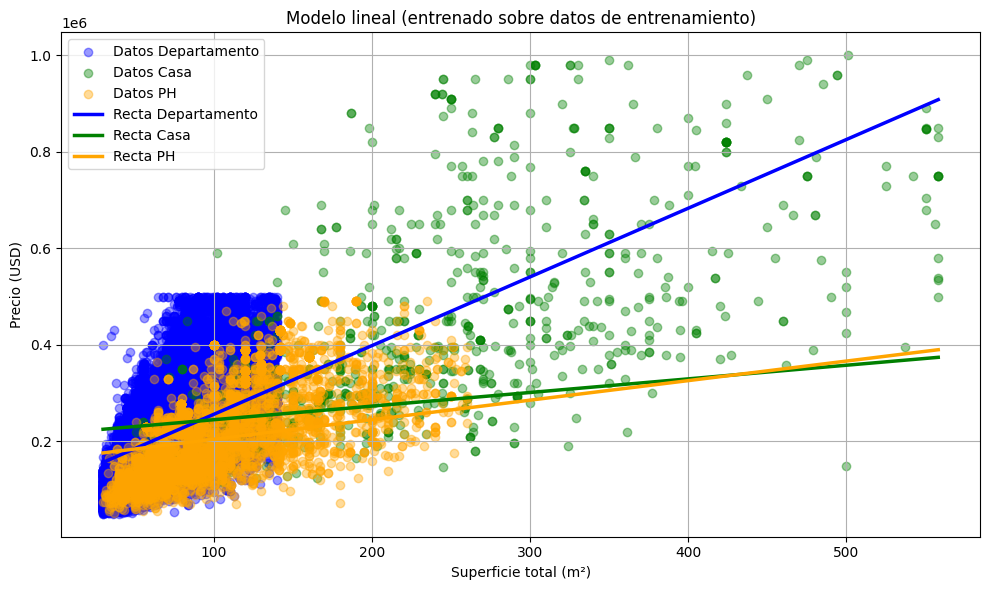

In [ ]:
plt.figure(figsize=(10, 6))

# Definir colores por tipo
colores = {'Departamento': 'blue', 'Casa': 'green', 'PH': 'orange'}

# 1️⃣ Scatterplot de puntos reales del train_set
for tipo, color in colores.items():
    grupo = train_set[train_set['prop_type'] == tipo]
    plt.scatter(
        grupo['surface_total'], grupo['price'],
        alpha=0.4, color=color, label=f'Datos {tipo}'
    )

# 2️⃣ Rectas predichas del modelo
# - definimos valores promedio para otras variables
avg_bathrooms = train_set['bathrooms'].mean()
avg_rooms = train_set['rooms'].mean()
avg_surface_covered = train_set['surface_covered'].mean()
l3_modo = train_set['l3'].mode()[0]  # barrio más frecuente

# - rango para surface_total
surface_range = np.linspace(train_set['surface_total'].min(), train_set['surface_total'].max(), 100)

for tipo, color in colores.items():
    # armar dataframe con las columnas del modelo
    df_line = pd.DataFrame({
        'surface_total': surface_range,
        'prop_type': tipo,
        'bathrooms': avg_bathrooms,
        'rooms': avg_rooms,
        'surface_covered': avg_surface_covered,
        'l3': l3_modo
    })
    # predecir
    df_line['y_pred'] = res_lineal_superficie.predict(df_line)

    # plotear
    plt.plot(
        df_line['surface_total'], df_line['y_pred'],
        color=color, linewidth=2.5, label=f'Recta {tipo}'
    )

# estética
plt.xlabel('Superficie total (m²)')
plt.ylabel('Precio (USD)')
plt.title('Modelo lineal (entrenado sobre datos de entrenamiento)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Consigna 5) **Modelo Lasso Estandarizado**

In [ ]:
scaler = StandardScaler()
num_features = ['rooms', 'bathrooms', 'surface_total', 'surface_covered']
cat_features = ['prop_type', 'l3']

X_train = train_set.drop(columns=["price", "created_on", "lat", "lon","l2"])
y_train = train_set["price"]
X_test = test_set.drop(columns=["price", "created_on", "lat", "lon", "l2"])
y_test = test_set["price"]

X_train_encoded = pd.get_dummies(X_train, columns=cat_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=cat_features, drop_first=True)

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = scaler.transform(X_test_encoded) # Cuidado con no hacer fit_transform en test! (Data Leakage)

In [ ]:
X_train_scaled

,rooms,bathrooms,surface_total,surface_covered,prop_type_Departamento,prop_type_PH,l3_Congreso,l3_Palermo,l3_Villa Pueyrredón
0,-0.402811,-0.539572,-0.371602,-0.385093,0.329305,-0.296887,-0.216287,0.456104,-0.253167
1,0.591381,1.361310,0.803409,0.902208,0.329305,-0.296887,-0.216287,0.456104,-0.253167
2,-0.402811,-0.539572,-0.575952,-0.449458,0.329305,-0.296887,-0.216287,0.456104,-0.253167
3,0.591381,-0.539572,-0.346058,-0.224180,0.329305,-0.296887,-0.216287,0.456104,-0.253167
4,0.591381,-0.539572,0.037097,0.226375,0.329305,-0.296887,-0.216287,0.456104,-0.253167
...,...,...,...,...,...,...,...,...,...
52043,0.591381,1.361310,0.215903,0.322923,0.329305,-0.296887,-0.216287,0.456104,-0.253167
52044,-0.402811,1.361310,-0.167252,-0.063268,0.329305,-0.296887,-0.216287,0.456104,-0.253167
52045,0.591381,1.361310,0.164816,0.322923,0.329305,-0.296887,-0.216287,0.456104,-0.253167
52046,1.585573,1.361310,0.956671,1.320581,0.329305,-0.296887,-0.216287,0.456104,-0.253167


In [ ]:
# Entrenar Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=10)
modelo_lasso.fit(X_train_scaled, y_train)

# Evaluar desempeño (ejemplo con R^2)
train_score = modelo_lasso.score(X_train_scaled, y_train)
test_score = modelo_lasso.score(X_test_scaled, y_test)

print(f"R^2 Train: {train_score:.4f}")
print(f"R^2 Test: {test_score:.4f}")


R^2 Train: 0.6958
R^2 Test: 0.6933


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
feature_names = X_train_scaled.columns.to_numpy()

lambdas = [2**i for i in range(40)]  # tu rango original, pero limitado para no tardar tanto

lambdas_list = []
term_list = []
coef_list = []

for lambda_ in lambdas:
    lasso = Lasso(alpha=lambda_, max_iter=2000, random_state=10)
    lasso.fit(X_train_scaled, y_train)  # usar X_train_scaled y y_train

    coefs = lasso.coef_
    terms = feature_names[coefs != 0]
    coefs_nonzero = coefs[coefs != 0]

    term_list.extend(terms)
    coef_list.extend(coefs_nonzero)
    term_list.append("intercept")
    coef_list.append(lasso.intercept_)
    lambdas_list.extend([lambda_] * (len(coefs_nonzero) + 1))

df_coefs = pd.DataFrame({
    'lambda': lambdas_list,
    'feature': term_list,
    'coefficient': coef_list
})

print(df_coefs.head(20))

    lambda                 feature    coefficient
0        1                   rooms    7657.086616
1        1               bathrooms   20695.704146
2        1           surface_total   27181.238232
3        1         surface_covered   39708.951458
4        1  prop_type_Departamento   20254.258611
5        1            prop_type_PH    8978.371927
6        1             l3_Congreso   -1909.717691
7        1              l3_Palermo   25751.999912
8        1     l3_Villa Pueyrredón    3972.552752
9        1               intercept  193387.584460
10       2                   rooms    7658.046123
11       2               bathrooms   20695.770829
12       2           surface_total   27176.670298
13       2         surface_covered   39707.925624
14       2  prop_type_Departamento   20237.829869
15       2            prop_type_PH    8963.818415
16       2             l3_Congreso   -1909.688135
17       2              l3_Palermo   25750.231123
18       2     l3_Villa Pueyrredón    3969.935483


In [ ]:
results_lasso_scaled = pd.DataFrame({
    "lambda":lambdas_list,
    "term": term_list,
    "coef": coef_list
}).sort_values(by="lambda", ascending=False).reset_index(drop=True)

results_lasso_scaled["log_lambda"] = np.log(results_lasso_scaled["lambda"])

In [ ]:
results_lasso_scaled.iloc[:40]

,lambda,term,coef,log_lambda
0,549755813888,intercept,193387.584460,27.032740
1,274877906944,intercept,193387.584460,26.339593
2,137438953472,intercept,193387.584460,25.646446
3,68719476736,intercept,193387.584460,24.953299
4,34359738368,intercept,193387.584460,24.260151
5,17179869184,intercept,193387.584460,23.567004
6,8589934592,intercept,193387.584460,22.873857
7,4294967296,intercept,193387.584460,22.180710
8,2147483648,intercept,193387.584460,21.487563
9,1073741824,intercept,193387.584460,20.794415


/tmp/ipython-input-129-4188479252.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.lineplot(


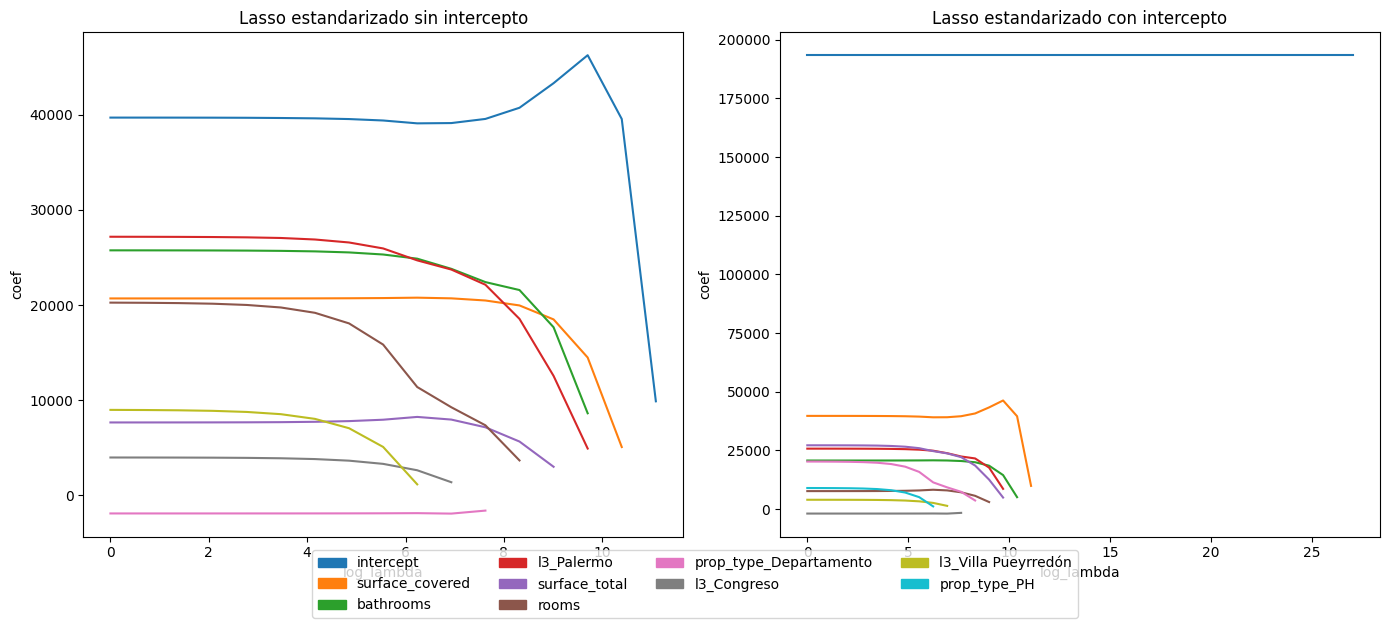

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

palette = sns.color_palette(n_colors=results_lasso_scaled["term"].nunique())

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso_scaled[results_lasso_scaled["term"] != "intercept"],
    ax=axs[0],
    palette=palette,
    legend=None
)
axs[0].set_title("Lasso estandarizado sin intercepto")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=results_lasso_scaled,
    ax=axs[1],
    palette=palette,
    legend=None
)
axs[1].set_title("Lasso estandarizado con intercepto")

# Crear leyenda manual
unique_terms = results_lasso_scaled["term"].unique()
patches = [mpatches.Patch(color=palette[i], label=term) for i, term in enumerate(unique_terms)]

fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()


Text(0.5, 1.0, 'Lasso estandarizado con intercepto (log_lambda >= 4)')

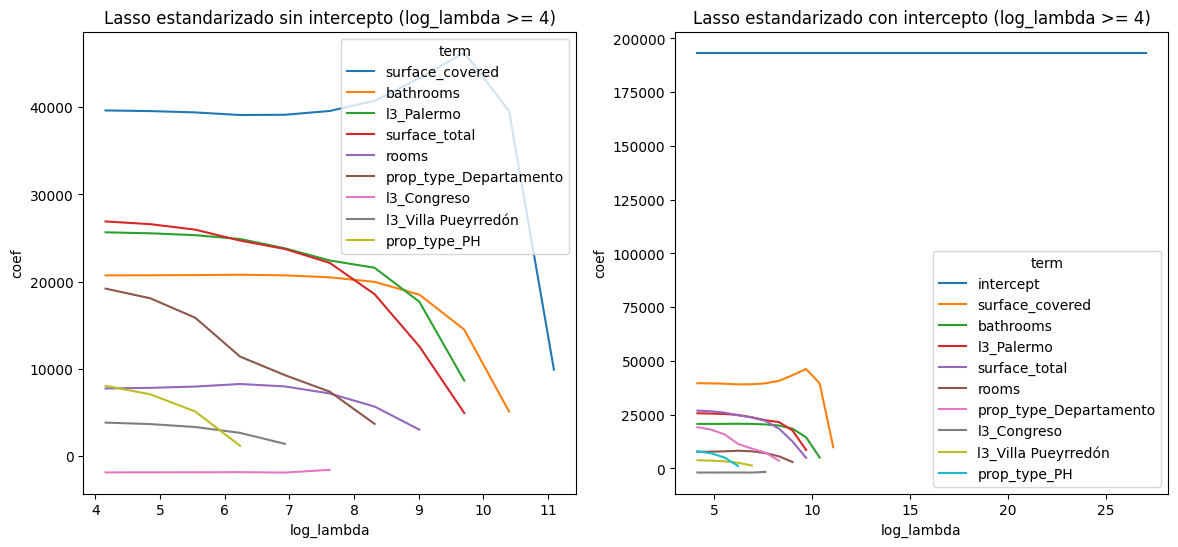

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

df_filtered = results_lasso_scaled[results_lasso_scaled["log_lambda"] >= 4]

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=df_filtered[df_filtered["term"] != "intercept"],
    ax=axs[0]
)
axs[0].set_title("Lasso estandarizado sin intercepto (log_lambda >= 4)")

sns.lineplot(
    x="log_lambda",
    y="coef",
    hue="term",
    data=df_filtered,
    ax=axs[1]
)
axs[1].set_title("Lasso estandarizado con intercepto (log_lambda >= 4)")


In [ ]:
lasso = Lasso()
lambdas = np.logspace(-2, 1, 50)  # 0.01 a 10, 50 valores


# Define the grid of hyperparameters to search over
param_grid = {
    'alpha': lambdas
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.01      ,  0.01151395,  0.01325711,  0.01526418,  0.01757511,
        0.0202359 ,  0.02329952,  0.02682696,  0.03088844,  0.0355648 ,
        0.04094915,  0.04714866,  0.05428675,  0.06250552,  0.07196857,
        0.08286428,  0.09540955,  0.10985411,  0.12648552,  0.14563485,
        0.16768329,  0.19306977,  0.22229965,  0.25595479,  0.29470517,
        0.33932218,  0.39069399,  0.44984327,  0.51794747,  0.59636233,
        0.68664885,  0.79060432,  0.91029818,  1.04811313,  1.20679264,
        1.38949549,  1.59985872,  1.84206997,  2.12095089,  2.44205309,
        2.8117687 ,  3.23745754,  3.72759372,  4.29193426,  4.94171336,
        5.68986603,  6.55128557,  7.54312006,  8.68511374, 10.        ])},
             scoring='neg_mean_squared_error')

In [ ]:
results_cv_lasso = pd.DataFrame(grid_search.cv_results_)
results_cv_lasso["log_lambda"] = np.log(results_cv_lasso["param_alpha"].astype(float))
results_cv_lasso["mean_cv_score"] = results_cv_lasso["mean_test_score"] * (-1)

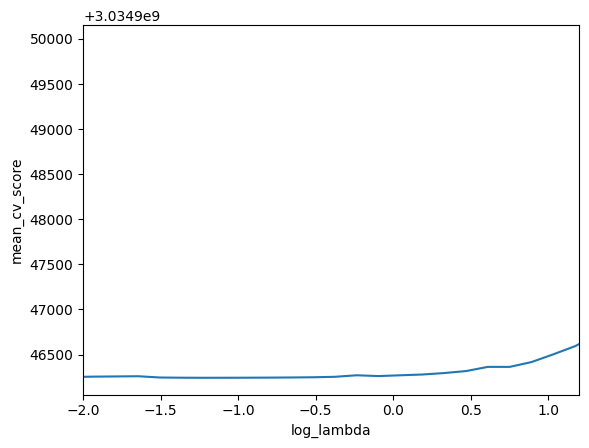

In [ ]:
sns.lineplot(
    x="log_lambda",
    y="mean_cv_score",
    data=results_cv_lasso

)

plt.xlim(-2,1.2)
plt.show()


In [ ]:
results_cv_lasso.loc[results_cv_lasso["mean_cv_score"] == results_cv_lasso["mean_cv_score"].min(),  ["log_lambda", "param_alpha", "mean_cv_score"]]

,log_lambda,param_alpha,mean_cv_score
24,-1.22178,0.294705,3.034946e+09


In [ ]:
best_lasso = grid_search.best_estimator_
print(best_lasso)

Lasso(alpha=np.float64(0.29470517025518095))


---


#Consigna 6) a)  **Modelos Random Forest**

In [ ]:
numero_grupo = 10

# Separar en entrenamiento y prueba
train_set, test_set = train_test_split(
    base_filtrada_final,
    test_size=0.2,
    random_state=numero_grupo
)

print("Entrenamiento:", train_set.shape)
print("Prueba:", test_set.shape)

Entrenamiento: (52048, 12)
Prueba: (13013, 12)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ===========================
# Preparar X y y
# ===========================

# NO eliminamos lat y lon
X_train = train_set.drop(columns=["price", "created_on"])
y_train = train_set["price"]
X_test = test_set.drop(columns=["price", "created_on"])
y_test = test_set["price"]

# ===========================
# Crear nuevas features
# ===========================

X_train["ratio_covered_total"] = X_train["surface_covered"] / (X_train["surface_total"] + 1e-5)
X_test["ratio_covered_total"] = X_test["surface_covered"] / (X_test["surface_total"] + 1e-5)

X_train["total_rooms_surface_ratio"] = X_train["surface_total"] / (X_train["rooms"] + 1)
X_test["total_rooms_surface_ratio"] = X_test["surface_total"] / (X_test["rooms"] + 1)

X_train["covered_rooms_surface_ratio"] = X_train["surface_covered"] / (X_train["rooms"] + 1)
X_test["covered_rooms_surface_ratio"] = X_test["surface_covered"] / (X_test["rooms"] + 1)

# ===========================
# Seleccionar columnas
# ===========================

num_features = ['rooms', 'bathrooms', 'surface_total', 'surface_covered',
                'ratio_covered_total', 'total_rooms_surface_ratio', 'covered_rooms_surface_ratio',
                'lat', 'lon']

cat_features = ['prop_type', 'l3']

# ===========================
# Preprocesamiento
# ===========================

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# ===========================
# Pipeline y modelo
# ===========================

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# ===========================
# Hiperparámetros
# ===========================

rf_param_grid = {
    "regressor__n_estimators": [200, 300, 500],
    "regressor__max_depth": [10, 20, 30, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__max_features": ["sqrt", "log2", None]
}

# ===========================
# RandomizedSearchCV
# ===========================

rf_random = RandomizedSearchCV(
    rf_pipeline,
    rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# ===========================
# Entrenar
# ===========================

rf_random.fit(X_train, y_train)

# ===========================
# Predecir y evaluar
# ===========================

best_model = rf_random.best_estimator_
rf_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
mae = mean_absolute_error(y_test, rf_pred)

print("=== Random Forest Final con lat/lon y nuevas features ===")
print("Mejores parámetros encontrados:", rf_random.best_params_)
print(f"RMSE en test set: {rmse:.2f}")
print(f"MAE en test set: {mae:.2f}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


=== Random Forest Final con lat/lon y nuevas features ===
Mejores parámetros encontrados: {'regressor__n_estimators': 500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': None, 'regressor__max_depth': None}
RMSE en test set: 32610.63
MAE en test set: 19359.30


In [ ]:
print("MAE en test set:", (19359.30 / 193737.17 * 100), "%")
print("RMSE en test set:", (32610.63 / 193737.17 * 100), "%")

rf_rmse = 32610.63
rf_mae = 19359.30
mae_pct_rf = 19359.30 / 193737.17

#print("MAE en test set:", (mae / 193737.17 * 100), "%")
#print("RMSE en test set:", (rmse / 193737.17 * 100), "%")

MAE en test set: 9.992558474968947 %
RMSE en test set: 16.832407534393116 %




---


#Consigna 6) b)  **Modelos Gradient Boost**

In [ ]:
## modelo Gradient bost para predecir precio


In [ ]:
#generamos las variables numéricas y categóricas
num_features = ['rooms', 'bathrooms', 'surface_total', 'surface_covered']
cat_features = ['prop_type', 'l2', 'l3']

#separamos variables exógenas y variable a predecir / ademas de los set de entrenamiento y de testeo
X_train = train_set.drop(columns=["price", "created_on", "lat", "lon"])
y_train = train_set["price"]
X_test = test_set.drop(columns=["price", "created_on", "lat", "lon"])
y_test = test_set["price"]

# Armamos el preprocesamiento de informacion

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

#usamos pipeline para asignar los pasos que va a correr el modelo.

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=10)) ## el numero del equipo.
])

# busqueda de hiperparametros # Los cambie porque ahora voy a usar Random Search
param_dist = {
    "regressor__n_estimators": range(200, 251, 20),
    "regressor__learning_rate": np.arange(0.10, 1, 0.1),
    "regressor__max_depth": range(5,12,5),
    "regressor__subsample": np.arange(0.6, 1.0, 0.12),
    "regressor__min_samples_split": range(8, 15),
    "regressor__min_samples_leaf": range(1, 6),
}

#Cross validation
gb_RandS = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=12,             # cantidad de combinaciones a probar
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=10
)

## Entrenamiento del modelo
gb_RandS.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['rooms',
                                                                                'bathrooms',
                                                                                'surface_total',
                                                                                'surface_covered']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['prop_type',
                                                                                'l2',
                                                                                'l3'])])),
                                             ('regressor',
                                              GradientBoostingRegressor(random_state=10))]),
                   n_iter=12, n_jobs=-1,
                   param_distribution...gressor__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'regressor__max_depth': range(5, 12, 5),
                                        'regressor__min_samples_leaf': range(1, 6),
                                        'regressor__min_samples_split': range(8, 15),
                                        'regressor__n_estimators': range(200, 251, 20),
                                        'regressor__subsample': array([0.6 , 0.72, 0.84, 0.96])},
                   random_state=10, scoring='neg_root_mean_squared_error',
                   verbose=1)

Ya tenemos los modelos de Gradient Boost generados (gb_brid) , ahora vamos a quedarnos con el modelo que tiene la mejor estimación.

In [ ]:
#Nos quedamos con el mejor modelo y hacemos que trabaje con el set de testea y validamos contra el y_test
gb_best_model = gb_RandS.best_estimator_
gb_pred = gb_best_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mae = mean_absolute_error(y_test, gb_pred)

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(gb_RandS.best_params_)
print(f"\nRMSE en test set: {gb_rmse:.2f}")
print(f"MAE en test set: {gb_mae:.2f}")

Mejores hiperparámetros encontrados:
{'regressor__subsample': np.float64(0.6), 'regressor__n_estimators': 200, 'regressor__min_samples_split': 8, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 10, 'regressor__learning_rate': np.float64(0.2)}

RMSE en test set: 44362.87
MAE en test set: 29209.49


In [ ]:
# El MAE ( Error absoluto medio ) nos indica que en promedio el modelo se equivoca en $29.209 dolares el precio de una propiedad.
# El RMSE ( raiz del error cuadratico medio ) penaliza mucho mas los errores grandes. En este caso nos indica que el error típico  , sensible a errores grandes, es de $ 44.362 dolares en el precio de una propiedad.

In [ ]:
mae_pct_gb = gb_mae / y_test.mean()
print(f"MAE representa el {mae_pct:.2%} del precio promedio")

MAE representa el 14.97% del precio promedio


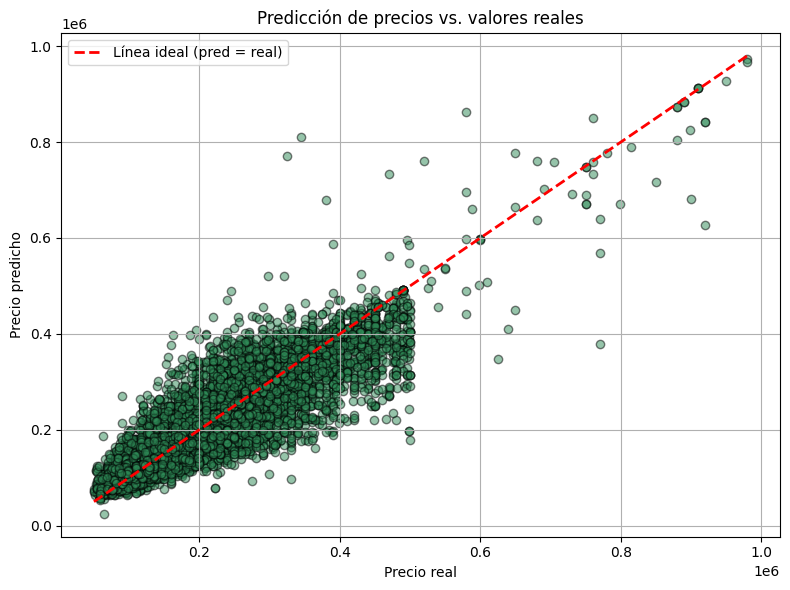

In [ ]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_pred, alpha=0.5, color='seagreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea ideal (pred = real)')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicción de precios vs. valores reales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Aclaraciones extras del modelo Gradient boost:
*Se intento probar el método GridSearchCV pero tardó mucho mas y dio peores resultados en MAE.
*En la busqueda de hiperparametros se probaron mayores rangos para la busqueda, fuimos acotando un poco para que el proceso de entrenamiento demore un tiempo lógico (15min maximo).



---


#Consigna 8) **Performance**


traemos la performance predictiva de cada modelo

In [ ]:
print("Modelo Lineal")
print(f"\nRMSE de Modelo Lineal en test set: {ml_rmse:.2f}")
print(f"MAE de Modelo Lineal en test set: {ml_mae:.2f}")
print(f"MAE de Modelo Lineal representa el {mae_pct_ml:.2%} del precio promedio")
print(" ")

print("Modelo Random Forest")
print(f"\nRMSE de Random forest en test set: {rf_rmse:.2f}")
print(f"MAE de Random forest en test set: {rf_mae:.2f}")
print(f"MAE de Random forest representa el {mae_pct_rf:.2%} del precio promedio")
print(" ")
print("Modelo Gradient Boost")
print(f"\nRMSE de Gradient boost en test set: {gb_rmse:.2f}")
print(f"MAE de Gradient boost en test set: {gb_mae:.2f}")
print(f"MAE de Gradient boost representa el {mae_pct_gb:.2%} del precio promedio")


Modelo Lineal

RMSE de Modelo Lineal en test set: 54005.93
MAE de Modelo Lineal en test set: 38194.24
MAE de Modelo Lineal representa el 19.71% del precio promedio
 
Modelo Random Forest

RMSE de Random forest en test set: 32610.63
MAE de Random forest en test set: 19359.30
MAE de Random forest representa el 9.99% del precio promedio
 
Modelo Gradient Boost

RMSE de Gradient boost en test set: 44362.87
MAE de Gradient boost en test set: 29209.49
MAE de Gradient boost representa el 14.97% del precio promedio


Podemos concluir que el modelo de Random forest está prediciendo mejores resultados que el modelo de Gradient boost, que a su vez este es mayor a la prediccion del modelo Lineal.
(agregamos la comparacion de tiempo ? RF = 53min vs GB = 12min vs ML = 3segundos) ??